# **WHAT MAKES A SUCCESSFUL MOVIE IN THE PHILIPPINES?**
*(Predicting Movie Gross Sales)*

# Import Packages

In [1]:
# IMPORT GENERIC PACKAGES
import numpy as np # numerical calc package
import pandas as pd # holds data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting

# plotting config
sns.set(style='white', rc={'figure.figsize':(20,10)})

from sklearn.linear_model import LinearRegression # linear regression package
from sklearn.model_selection import train_test_split # split dataset
from sklearn.metrics import mean_squared_error as mse # Measurement metric
from sklearn.metrics import mean_absolute_error as mae

# Load Data

In [2]:
# read data into a DataFrame
data = pd.read_csv('THIRTEENTH_FINAL_DATA.csv')

In [3]:
data.head()

,TITLE,ID,RUNTIME,IMDB_RATING,DIRECTOR,DIRECTOR_FB_LIKES,ACTOR_1,ACTOR_1_FB_LIKES,ACTOR_2,ACTOR_2_FB_LIKES,...,BUDGET,FILMING_LOCATION,PROD_COMPANY,DISTRIBUTOR,GENRES,OPENING,MOVIE_CERTIFICATE,GENRE_1,GENRE_2,GENRE_3
0,Jumanji: The Next Level,tt7975244,123.0,7.0,Jake Kasdan,52.0,Dwayne Johnson,12000.0,Jack Black,7300000.0,...,125000000.0,"Georgia State University, Atlanta, Georgia, USA","Hartbeat Productions, Instinctual VFX, Matt To...",Sony Pictures Releasing,"Action, Adventure, Comedy, Fantasy",1420476.0,PG-13,0.289819,0.640779,0.069401
1,Frozen II,tt4520988,103.0,7.2,Chris Buck,69.0,Kristen Bell,704000.0,Idina Menzel,NaN,...,150000000.0,"Norway, Norge","Walt Disney Animation Studios, Walt Disney Pic...",Walt Disney Studios Motion Pictures,"Animation, Adventure, Comedy",6190359.0,G,0.084809,0.828672,0.086519
2,Avengers: Endgame,tt4154796,181.0,8.5,Anthony Russo,94.0,Robert Downey Jr.,21000.0,Chris Evans,11000.0,...,356000000.0,"Atlanta, Georgia, USA",Marvel Studios,Walt Disney Studios Motion Pictures,"Action, Adventure, Drama, Sci-Fi",17977175.0,PG-13,0.823106,0.076776,0.100118
3,Captain Marvel,tt4154664,123.0,6.9,Anna Boden,16.0,Brie Larson,1600.0,Samuel L. Jackson,3700000.0,...,175000000.0,"Los Angeles, California, USA","Walt Disney Pictures, Marvel Studios, Animal L...",Walt Disney Studios Motion Pictures,"Action, Adventure, Sci-Fi",6113889.0,PG-13,0.813112,0.103527,0.083361
4,Spider-Man: Far from Home,tt6320628,129.0,7.6,Jon Watts,NaN,Tom Holland,55000.0,Samuel L. Jackson,3700000.0,...,160000000.0,"Hertfordshire, England, UK","Columbia Pictures, Pascal Pictures, Marvel Stu...",Sony Pictures Releasing,"Action, Adventure, Sci-Fi",5719954.0,PG-13,0.813179,0.103460,0.083361


In [4]:
# !pip install pandas_profiling

In [5]:
import pandas_profiling as pp

In [6]:
report = pp.ProfileReport(data)
report.to_file('data_assessment2.html')

# Clean Data

In [7]:
# Count Rows, Columns
data.shape

(1655, 30)

In [8]:
# Display Data Types
data.dtypes

TITLE                 object
ID                    object
RUNTIME              float64
IMDB_RATING          float64
DIRECTOR              object
DIRECTOR_FB_LIKES    float64
ACTOR_1               object
ACTOR_1_FB_LIKES     float64
ACTOR_2               object
ACTOR_2_FB_LIKES     float64
ACTOR_3               object
ACTOR_3_FB_LIKES     float64
POPULARITY            object
METASCORE            float64
STORYLINE             object
GROSS                  int64
TOP_GROSS              int64
COUNTRIES             object
LANGUAGES             object
RELEASE_DATE          object
BUDGET               float64
FILMING_LOCATION      object
PROD_COMPANY          object
DISTRIBUTOR           object
GENRES                object
OPENING              float64
MOVIE_CERTIFICATE     object
GENRE_1              float64
GENRE_2              float64
GENRE_3              float64
dtype: object

In [9]:
# Count unique movie
data['ID'].count()

1655

In [10]:
# Convert RELEASE DATE Data Type to "DATE"
data['RELEASE_DATE'] = pd.to_datetime(data['RELEASE_DATE'], errors='coerce')

In [11]:
data['RELEASE_DATE'].isna().sum()

0

In [12]:
# New Column for Release Year from Release Date
data['RELEASE_YEAR'] = pd.DatetimeIndex(data['RELEASE_DATE']).year
data.head()

,TITLE,ID,RUNTIME,IMDB_RATING,DIRECTOR,DIRECTOR_FB_LIKES,ACTOR_1,ACTOR_1_FB_LIKES,ACTOR_2,ACTOR_2_FB_LIKES,...,FILMING_LOCATION,PROD_COMPANY,DISTRIBUTOR,GENRES,OPENING,MOVIE_CERTIFICATE,GENRE_1,GENRE_2,GENRE_3,RELEASE_YEAR
0,Jumanji: The Next Level,tt7975244,123.0,7.0,Jake Kasdan,52.0,Dwayne Johnson,12000.0,Jack Black,7300000.0,...,"Georgia State University, Atlanta, Georgia, USA","Hartbeat Productions, Instinctual VFX, Matt To...",Sony Pictures Releasing,"Action, Adventure, Comedy, Fantasy",1420476.0,PG-13,0.289819,0.640779,0.069401,2019
1,Frozen II,tt4520988,103.0,7.2,Chris Buck,69.0,Kristen Bell,704000.0,Idina Menzel,NaN,...,"Norway, Norge","Walt Disney Animation Studios, Walt Disney Pic...",Walt Disney Studios Motion Pictures,"Animation, Adventure, Comedy",6190359.0,G,0.084809,0.828672,0.086519,2019
2,Avengers: Endgame,tt4154796,181.0,8.5,Anthony Russo,94.0,Robert Downey Jr.,21000.0,Chris Evans,11000.0,...,"Atlanta, Georgia, USA",Marvel Studios,Walt Disney Studios Motion Pictures,"Action, Adventure, Drama, Sci-Fi",17977175.0,PG-13,0.823106,0.076776,0.100118,2019
3,Captain Marvel,tt4154664,123.0,6.9,Anna Boden,16.0,Brie Larson,1600.0,Samuel L. Jackson,3700000.0,...,"Los Angeles, California, USA","Walt Disney Pictures, Marvel Studios, Animal L...",Walt Disney Studios Motion Pictures,"Action, Adventure, Sci-Fi",6113889.0,PG-13,0.813112,0.103527,0.083361,2019
4,Spider-Man: Far from Home,tt6320628,129.0,7.6,Jon Watts,NaN,Tom Holland,55000.0,Samuel L. Jackson,3700000.0,...,"Hertfordshire, England, UK","Columbia Pictures, Pascal Pictures, Marvel Stu...",Sony Pictures Releasing,"Action, Adventure, Sci-Fi",5719954.0,PG-13,0.813179,0.103460,0.083361,2019


In [13]:
# New Column for Release Month from Release Date
data['RELEASE_MONTH'] = pd.DatetimeIndex(data['RELEASE_DATE']).month
data.head()

,TITLE,ID,RUNTIME,IMDB_RATING,DIRECTOR,DIRECTOR_FB_LIKES,ACTOR_1,ACTOR_1_FB_LIKES,ACTOR_2,ACTOR_2_FB_LIKES,...,PROD_COMPANY,DISTRIBUTOR,GENRES,OPENING,MOVIE_CERTIFICATE,GENRE_1,GENRE_2,GENRE_3,RELEASE_YEAR,RELEASE_MONTH
0,Jumanji: The Next Level,tt7975244,123.0,7.0,Jake Kasdan,52.0,Dwayne Johnson,12000.0,Jack Black,7300000.0,...,"Hartbeat Productions, Instinctual VFX, Matt To...",Sony Pictures Releasing,"Action, Adventure, Comedy, Fantasy",1420476.0,PG-13,0.289819,0.640779,0.069401,2019,12
1,Frozen II,tt4520988,103.0,7.2,Chris Buck,69.0,Kristen Bell,704000.0,Idina Menzel,NaN,...,"Walt Disney Animation Studios, Walt Disney Pic...",Walt Disney Studios Motion Pictures,"Animation, Adventure, Comedy",6190359.0,G,0.084809,0.828672,0.086519,2019,11
2,Avengers: Endgame,tt4154796,181.0,8.5,Anthony Russo,94.0,Robert Downey Jr.,21000.0,Chris Evans,11000.0,...,Marvel Studios,Walt Disney Studios Motion Pictures,"Action, Adventure, Drama, Sci-Fi",17977175.0,PG-13,0.823106,0.076776,0.100118,2019,4
3,Captain Marvel,tt4154664,123.0,6.9,Anna Boden,16.0,Brie Larson,1600.0,Samuel L. Jackson,3700000.0,...,"Walt Disney Pictures, Marvel Studios, Animal L...",Walt Disney Studios Motion Pictures,"Action, Adventure, Sci-Fi",6113889.0,PG-13,0.813112,0.103527,0.083361,2019,8
4,Spider-Man: Far from Home,tt6320628,129.0,7.6,Jon Watts,NaN,Tom Holland,55000.0,Samuel L. Jackson,3700000.0,...,"Columbia Pictures, Pascal Pictures, Marvel Stu...",Sony Pictures Releasing,"Action, Adventure, Sci-Fi",5719954.0,PG-13,0.813179,0.103460,0.083361,2019,2


In [14]:
#change numerical months into words
import calendar
data['RELEASE_MONTH'] = data['RELEASE_MONTH'].apply(lambda x: calendar.month_name[x])
data.head()

,TITLE,ID,RUNTIME,IMDB_RATING,DIRECTOR,DIRECTOR_FB_LIKES,ACTOR_1,ACTOR_1_FB_LIKES,ACTOR_2,ACTOR_2_FB_LIKES,...,PROD_COMPANY,DISTRIBUTOR,GENRES,OPENING,MOVIE_CERTIFICATE,GENRE_1,GENRE_2,GENRE_3,RELEASE_YEAR,RELEASE_MONTH
0,Jumanji: The Next Level,tt7975244,123.0,7.0,Jake Kasdan,52.0,Dwayne Johnson,12000.0,Jack Black,7300000.0,...,"Hartbeat Productions, Instinctual VFX, Matt To...",Sony Pictures Releasing,"Action, Adventure, Comedy, Fantasy",1420476.0,PG-13,0.289819,0.640779,0.069401,2019,December
1,Frozen II,tt4520988,103.0,7.2,Chris Buck,69.0,Kristen Bell,704000.0,Idina Menzel,NaN,...,"Walt Disney Animation Studios, Walt Disney Pic...",Walt Disney Studios Motion Pictures,"Animation, Adventure, Comedy",6190359.0,G,0.084809,0.828672,0.086519,2019,November
2,Avengers: Endgame,tt4154796,181.0,8.5,Anthony Russo,94.0,Robert Downey Jr.,21000.0,Chris Evans,11000.0,...,Marvel Studios,Walt Disney Studios Motion Pictures,"Action, Adventure, Drama, Sci-Fi",17977175.0,PG-13,0.823106,0.076776,0.100118,2019,April
3,Captain Marvel,tt4154664,123.0,6.9,Anna Boden,16.0,Brie Larson,1600.0,Samuel L. Jackson,3700000.0,...,"Walt Disney Pictures, Marvel Studios, Animal L...",Walt Disney Studios Motion Pictures,"Action, Adventure, Sci-Fi",6113889.0,PG-13,0.813112,0.103527,0.083361,2019,August
4,Spider-Man: Far from Home,tt6320628,129.0,7.6,Jon Watts,NaN,Tom Holland,55000.0,Samuel L. Jackson,3700000.0,...,"Columbia Pictures, Pascal Pictures, Marvel Stu...",Sony Pictures Releasing,"Action, Adventure, Sci-Fi",5719954.0,PG-13,0.813179,0.103460,0.083361,2019,February


In [15]:
data[data['RELEASE_YEAR'] < 2000]

,TITLE,ID,RUNTIME,IMDB_RATING,DIRECTOR,DIRECTOR_FB_LIKES,ACTOR_1,ACTOR_1_FB_LIKES,ACTOR_2,ACTOR_2_FB_LIKES,...,PROD_COMPANY,DISTRIBUTOR,GENRES,OPENING,MOVIE_CERTIFICATE,GENRE_1,GENRE_2,GENRE_3,RELEASE_YEAR,RELEASE_MONTH


In [16]:
# Count Number of Null Storylines
data['STORYLINE'].isna().sum()

0

In [17]:
# Display Data with Gross = 0
data[data['GROSS'] <= 0]

,TITLE,ID,RUNTIME,IMDB_RATING,DIRECTOR,DIRECTOR_FB_LIKES,ACTOR_1,ACTOR_1_FB_LIKES,ACTOR_2,ACTOR_2_FB_LIKES,...,PROD_COMPANY,DISTRIBUTOR,GENRES,OPENING,MOVIE_CERTIFICATE,GENRE_1,GENRE_2,GENRE_3,RELEASE_YEAR,RELEASE_MONTH


In [18]:
data['FLAG_TOP_GROSS'] = np.where(data['GROSS'] >= 2000000, 1, 0)

In [19]:
data[["GROSS", "FLAG_TOP_GROSS"]].head()

,GROSS,FLAG_TOP_GROSS
0,4258426,1
1,16380006,1
2,32839486,1
3,12492800,1
4,10578935,1


In [20]:
# Count Null Values For Director and Actors and their FB likes
DIRECTOR_NULL = data['DIRECTOR'].isna().sum()
ACTOR_1_NULL = data['ACTOR_1'].isna().sum()
ACTOR_2_NULL = data['ACTOR_2'].isna().sum()
ACTOR_3_NULL = data['ACTOR_3'].isna().sum()
DIRECTORFB_NULL = data['DIRECTOR_FB_LIKES'].isna().sum()
ACTOR_1FB_NULL = data['ACTOR_1_FB_LIKES'].isna().sum()
ACTOR_2FB_NULL = data['ACTOR_2_FB_LIKES'].isna().sum()
ACTOR_3FB_NULL = data['ACTOR_3_FB_LIKES'].isna().sum()

DA_NULL = [DIRECTOR_NULL, ACTOR_1_NULL, ACTOR_2_NULL, ACTOR_3_NULL, DIRECTORFB_NULL, ACTOR_1FB_NULL, ACTOR_2FB_NULL, ACTOR_3FB_NULL]
DA_NULL

[0, 15, 16, 17, 514, 268, 514, 665]

In [21]:
# Fill Null Values For Director and Actors and their FB likes
data['DIRECTOR'] = data['DIRECTOR'].fillna('UNKNOWN') 
data['ACTOR_1'] = data['ACTOR_1'].fillna('UNKNOWN') 
data['ACTOR_2'] = data['ACTOR_2'].fillna('UNKNOWN')
data['ACTOR_3'] = data['ACTOR_3'].fillna('UNKNOWN') 
# data['DIRECTOR_FB_LIKES'] = data['DIRECTOR_FB_LIKES'].fillna(data.DIRECTOR_FB_LIKES.mean()) 
# data['ACTOR_1_FB_LIKES'] = data['ACTOR_1_FB_LIKES'].fillna(data.ACTOR_1_FB_LIKES.mean()) 
# data['ACTOR_2_FB_LIKES'] = data['ACTOR_2_FB_LIKES'].fillna(data.ACTOR_2_FB_LIKES.mean())
# data['ACTOR_3_FB_LIKES'] = data['ACTOR_3_FB_LIKES'].fillna(data.ACTOR_3_FB_LIKES.mean()) 

In [22]:
# Recount Null Values For Director and Actors and their FB likes
DIRECTOR_NULL = data['DIRECTOR'].isna().sum()
ACTOR_1_NULL = data['ACTOR_1'].isna().sum()
ACTOR_2_NULL = data['ACTOR_2'].isna().sum()
ACTOR_3_NULL = data['ACTOR_3'].isna().sum()
DIRECTORFB_NULL = data['DIRECTOR_FB_LIKES'].isna().sum()
ACTOR_1FB_NULL = data['ACTOR_1_FB_LIKES'].isna().sum()
ACTOR_2FB_NULL = data['ACTOR_2_FB_LIKES'].isna().sum()
ACTOR_3FB_NULL = data['ACTOR_3_FB_LIKES'].isna().sum()

DA_NULL = [DIRECTOR_NULL, ACTOR_1_NULL, ACTOR_2_NULL, ACTOR_3_NULL, DIRECTORFB_NULL, ACTOR_1FB_NULL, ACTOR_2FB_NULL, ACTOR_3FB_NULL]
DA_NULL

[0, 0, 0, 0, 514, 268, 514, 665]

*We won't be using these data for directors' & actors' FB Likes since >30% are missing values.*

In [23]:
# Count Null Values
MPAA_NULL = data['MOVIE_CERTIFICATE'].isna().sum()
RUNTIME_NULL = data['RUNTIME'].isna().sum()
BUDGET_NULL = data['BUDGET'].isna().sum()
RATING_NULL = data['IMDB_RATING'].isna().sum()

NULL = [MPAA_NULL, RUNTIME_NULL, BUDGET_NULL, RATING_NULL]
NULL

[17, 23, 382, 3]

In [24]:
# Fill Null Values
data['MOVIE_CERTIFICATE'] = data['MOVIE_CERTIFICATE'].fillna('Not Rated') 
data['RUNTIME'] = data['RUNTIME'].fillna(data.RUNTIME.mean())
data['BUDGET'] = data['BUDGET'].fillna(data.BUDGET.mean())
data['IMDB_RATING'] = data['IMDB_RATING'].fillna(data.IMDB_RATING.mean())

In [25]:
# Recount Null Values
MPAA_NULL = data['MOVIE_CERTIFICATE'].isna().sum()
RUNTIME_NULL = data['RUNTIME'].isna().sum()
BUDGET_NULL = data['BUDGET'].isna().sum()
RATING_NULL = data['IMDB_RATING'].isna().sum()

NULL = [MPAA_NULL, RUNTIME_NULL, BUDGET_NULL, RATING_NULL]
NULL

[0, 0, 0, 0]

In [26]:
# Split Countries and concatenate it with the data
data = pd.concat([data, data.COUNTRIES.str.split(',',expand=True)],1)
data.head()

,TITLE,ID,RUNTIME,IMDB_RATING,DIRECTOR,DIRECTOR_FB_LIKES,ACTOR_1,ACTOR_1_FB_LIKES,ACTOR_2,ACTOR_2_FB_LIKES,...,FLAG_TOP_GROSS,0,1,2,3,4,5,6,7,8
0,Jumanji: The Next Level,tt7975244,123.0,7.0,Jake Kasdan,52.0,Dwayne Johnson,12000.0,Jack Black,7300000.0,...,1,USA,None,None,None,None,None,None,None,None
1,Frozen II,tt4520988,103.0,7.2,Chris Buck,69.0,Kristen Bell,704000.0,Idina Menzel,NaN,...,1,USA,None,None,None,None,None,None,None,None
2,Avengers: Endgame,tt4154796,181.0,8.5,Anthony Russo,94.0,Robert Downey Jr.,21000.0,Chris Evans,11000.0,...,1,USA,None,None,None,None,None,None,None,None
3,Captain Marvel,tt4154664,123.0,6.9,Anna Boden,16.0,Brie Larson,1600.0,Samuel L. Jackson,3700000.0,...,1,USA,Australia,None,None,None,None,None,None,None
4,Spider-Man: Far from Home,tt6320628,129.0,7.6,Jon Watts,NaN,Tom Holland,55000.0,Samuel L. Jackson,3700000.0,...,1,USA,None,None,None,None,None,None,None,None


In [27]:
# Rename Columns
data = data.rename(columns={0: 'COUNTRY_1', 1: 'COUNTRY_2', 2:'COUNTRY_3', 3:'COUNTRY_4', 4:'COUNTRY_5', 5:'COUNTRY_6', 6:'COUNTRY_7', 7:'COUNTRY_8', 8:'COUNTRY_9'})
data.head()

,TITLE,ID,RUNTIME,IMDB_RATING,DIRECTOR,DIRECTOR_FB_LIKES,ACTOR_1,ACTOR_1_FB_LIKES,ACTOR_2,ACTOR_2_FB_LIKES,...,FLAG_TOP_GROSS,COUNTRY_1,COUNTRY_2,COUNTRY_3,COUNTRY_4,COUNTRY_5,COUNTRY_6,COUNTRY_7,COUNTRY_8,COUNTRY_9
0,Jumanji: The Next Level,tt7975244,123.0,7.0,Jake Kasdan,52.0,Dwayne Johnson,12000.0,Jack Black,7300000.0,...,1,USA,None,None,None,None,None,None,None,None
1,Frozen II,tt4520988,103.0,7.2,Chris Buck,69.0,Kristen Bell,704000.0,Idina Menzel,NaN,...,1,USA,None,None,None,None,None,None,None,None
2,Avengers: Endgame,tt4154796,181.0,8.5,Anthony Russo,94.0,Robert Downey Jr.,21000.0,Chris Evans,11000.0,...,1,USA,None,None,None,None,None,None,None,None
3,Captain Marvel,tt4154664,123.0,6.9,Anna Boden,16.0,Brie Larson,1600.0,Samuel L. Jackson,3700000.0,...,1,USA,Australia,None,None,None,None,None,None,None
4,Spider-Man: Far from Home,tt6320628,129.0,7.6,Jon Watts,NaN,Tom Holland,55000.0,Samuel L. Jackson,3700000.0,...,1,USA,None,None,None,None,None,None,None,None


In [28]:
# Drop other Country Columns, retain only Country_1
data = data.drop(columns = ["COUNTRY_2", "COUNTRY_3", "COUNTRY_4", "COUNTRY_5", "COUNTRY_6", "COUNTRY_7", "COUNTRY_8", "COUNTRY_9"])
data.head()

,TITLE,ID,RUNTIME,IMDB_RATING,DIRECTOR,DIRECTOR_FB_LIKES,ACTOR_1,ACTOR_1_FB_LIKES,ACTOR_2,ACTOR_2_FB_LIKES,...,GENRES,OPENING,MOVIE_CERTIFICATE,GENRE_1,GENRE_2,GENRE_3,RELEASE_YEAR,RELEASE_MONTH,FLAG_TOP_GROSS,COUNTRY_1
0,Jumanji: The Next Level,tt7975244,123.0,7.0,Jake Kasdan,52.0,Dwayne Johnson,12000.0,Jack Black,7300000.0,...,"Action, Adventure, Comedy, Fantasy",1420476.0,PG-13,0.289819,0.640779,0.069401,2019,December,1,USA
1,Frozen II,tt4520988,103.0,7.2,Chris Buck,69.0,Kristen Bell,704000.0,Idina Menzel,NaN,...,"Animation, Adventure, Comedy",6190359.0,G,0.084809,0.828672,0.086519,2019,November,1,USA
2,Avengers: Endgame,tt4154796,181.0,8.5,Anthony Russo,94.0,Robert Downey Jr.,21000.0,Chris Evans,11000.0,...,"Action, Adventure, Drama, Sci-Fi",17977175.0,PG-13,0.823106,0.076776,0.100118,2019,April,1,USA
3,Captain Marvel,tt4154664,123.0,6.9,Anna Boden,16.0,Brie Larson,1600.0,Samuel L. Jackson,3700000.0,...,"Action, Adventure, Sci-Fi",6113889.0,PG-13,0.813112,0.103527,0.083361,2019,August,1,USA
4,Spider-Man: Far from Home,tt6320628,129.0,7.6,Jon Watts,NaN,Tom Holland,55000.0,Samuel L. Jackson,3700000.0,...,"Action, Adventure, Sci-Fi",5719954.0,PG-13,0.813179,0.103460,0.083361,2019,February,1,USA


In [29]:
data['COUNTRY_1'].isna().sum()

157

In [30]:
# Most Frequent Country
data.groupby('COUNTRY_1')['COUNTRY_1'].count().sort_values()

COUNTRY_1
Argentina                 1
Sweden                    1
Netherlands               1
Mexico                    1
Malta                     1
Malaysia                  1
United Arab Emirates      1
India                     1
Iceland                   1
Vietnam                   1
Belgium                   1
Hungary                   2
Switzerland               2
Indonesia                 2
Ireland                   2
Czech Republic            2
Italy                     3
Finland                   3
Russia                    3
South Africa              5
Thailand                  6
New Zealand               6
Australia                 9
South Korea              11
Spain                    11
Hong Kong                12
China                    17
Germany                  19
Japan                    21
France                   28
Canada                   31
UK                      100
Philippines             231
USA                     961
Name: COUNTRY_1, dtype: int64

In [31]:
# Fill Null Countries with USA (Country with majority count)
data['COUNTRY_1'] = data['COUNTRY_1'].fillna('USA')
data['COUNTRY_1'].isna().sum()

0

In [32]:
# Split Languages and concatenate it with the data
data = pd.concat([data, data.LANGUAGES.str.split(',',expand=True)], 1)
data.head()

,TITLE,ID,RUNTIME,IMDB_RATING,DIRECTOR,DIRECTOR_FB_LIKES,ACTOR_1,ACTOR_1_FB_LIKES,ACTOR_2,ACTOR_2_FB_LIKES,...,0,1,2,3,4,5,6,7,8,9
0,Jumanji: The Next Level,tt7975244,123.0,7.0,Jake Kasdan,52.0,Dwayne Johnson,12000.0,Jack Black,7300000.0,...,English,None,None,None,None,None,None,None,None,None
1,Frozen II,tt4520988,103.0,7.2,Chris Buck,69.0,Kristen Bell,704000.0,Idina Menzel,NaN,...,English,None,None,None,None,None,None,None,None,None
2,Avengers: Endgame,tt4154796,181.0,8.5,Anthony Russo,94.0,Robert Downey Jr.,21000.0,Chris Evans,11000.0,...,English,Japanese,Xhosa,German,None,None,None,None,None,None
3,Captain Marvel,tt4154664,123.0,6.9,Anna Boden,16.0,Brie Larson,1600.0,Samuel L. Jackson,3700000.0,...,English,None,None,None,None,None,None,None,None,None
4,Spider-Man: Far from Home,tt6320628,129.0,7.6,Jon Watts,NaN,Tom Holland,55000.0,Samuel L. Jackson,3700000.0,...,English,Italian,Czech,None,None,None,None,None,None,None


In [33]:
# Rename Columns
data = data.rename(columns={0: 'LANGUAGE_1', 1: 'LANGUAGE_2', 2:'LANGUAGE_3', 3:'LANGUAGE_4', 4:'LANGUAGE_5', 5:'LANGUAGE_6', 6:'LANGUAGE_7', 7:'LANGUAGE_8', 8:'LANGUAGE_9', 9:'LANGUAGE_10'})
data.head()

,TITLE,ID,RUNTIME,IMDB_RATING,DIRECTOR,DIRECTOR_FB_LIKES,ACTOR_1,ACTOR_1_FB_LIKES,ACTOR_2,ACTOR_2_FB_LIKES,...,LANGUAGE_1,LANGUAGE_2,LANGUAGE_3,LANGUAGE_4,LANGUAGE_5,LANGUAGE_6,LANGUAGE_7,LANGUAGE_8,LANGUAGE_9,LANGUAGE_10
0,Jumanji: The Next Level,tt7975244,123.0,7.0,Jake Kasdan,52.0,Dwayne Johnson,12000.0,Jack Black,7300000.0,...,English,None,None,None,None,None,None,None,None,None
1,Frozen II,tt4520988,103.0,7.2,Chris Buck,69.0,Kristen Bell,704000.0,Idina Menzel,NaN,...,English,None,None,None,None,None,None,None,None,None
2,Avengers: Endgame,tt4154796,181.0,8.5,Anthony Russo,94.0,Robert Downey Jr.,21000.0,Chris Evans,11000.0,...,English,Japanese,Xhosa,German,None,None,None,None,None,None
3,Captain Marvel,tt4154664,123.0,6.9,Anna Boden,16.0,Brie Larson,1600.0,Samuel L. Jackson,3700000.0,...,English,None,None,None,None,None,None,None,None,None
4,Spider-Man: Far from Home,tt6320628,129.0,7.6,Jon Watts,NaN,Tom Holland,55000.0,Samuel L. Jackson,3700000.0,...,English,Italian,Czech,None,None,None,None,None,None,None


In [34]:
# Drop other Language Columns, retain only Language_1
data = data.drop(columns = ["LANGUAGE_2", "LANGUAGE_3", "LANGUAGE_4", "LANGUAGE_5", "LANGUAGE_6", "LANGUAGE_7", "LANGUAGE_8", "LANGUAGE_9", "LANGUAGE_10"])
data.head()

,TITLE,ID,RUNTIME,IMDB_RATING,DIRECTOR,DIRECTOR_FB_LIKES,ACTOR_1,ACTOR_1_FB_LIKES,ACTOR_2,ACTOR_2_FB_LIKES,...,OPENING,MOVIE_CERTIFICATE,GENRE_1,GENRE_2,GENRE_3,RELEASE_YEAR,RELEASE_MONTH,FLAG_TOP_GROSS,COUNTRY_1,LANGUAGE_1
0,Jumanji: The Next Level,tt7975244,123.0,7.0,Jake Kasdan,52.0,Dwayne Johnson,12000.0,Jack Black,7300000.0,...,1420476.0,PG-13,0.289819,0.640779,0.069401,2019,December,1,USA,English
1,Frozen II,tt4520988,103.0,7.2,Chris Buck,69.0,Kristen Bell,704000.0,Idina Menzel,NaN,...,6190359.0,G,0.084809,0.828672,0.086519,2019,November,1,USA,English
2,Avengers: Endgame,tt4154796,181.0,8.5,Anthony Russo,94.0,Robert Downey Jr.,21000.0,Chris Evans,11000.0,...,17977175.0,PG-13,0.823106,0.076776,0.100118,2019,April,1,USA,English
3,Captain Marvel,tt4154664,123.0,6.9,Anna Boden,16.0,Brie Larson,1600.0,Samuel L. Jackson,3700000.0,...,6113889.0,PG-13,0.813112,0.103527,0.083361,2019,August,1,USA,English
4,Spider-Man: Far from Home,tt6320628,129.0,7.6,Jon Watts,NaN,Tom Holland,55000.0,Samuel L. Jackson,3700000.0,...,5719954.0,PG-13,0.813179,0.103460,0.083361,2019,February,1,USA,English


In [35]:
# Count Language with Null Values
data['LANGUAGE_1'].isna().sum()

0

# Feature Engineering

## Dummy Variables

In [36]:
# Set Variables
categorical = ['MOVIE_CERTIFICATE', 'COUNTRY_1', 'LANGUAGE_1', 'RELEASE_MONTH']

# DUMMY VARIABLES: MULTIHOT ENCODING
data_dummies = pd.get_dummies(data[categorical].astype(str))
data_dummies

,MOVIE_CERTIFICATE_G,MOVIE_CERTIFICATE_Not Rated,MOVIE_CERTIFICATE_PG,MOVIE_CERTIFICATE_PG-13,MOVIE_CERTIFICATE_R,MOVIE_CERTIFICATE_R-13,MOVIE_CERTIFICATE_R-16,MOVIE_CERTIFICATE_R-18,COUNTRY_1_Argentina,COUNTRY_1_Australia,...,RELEASE_MONTH_December,RELEASE_MONTH_February,RELEASE_MONTH_January,RELEASE_MONTH_July,RELEASE_MONTH_June,RELEASE_MONTH_March,RELEASE_MONTH_May,RELEASE_MONTH_November,RELEASE_MONTH_October,RELEASE_MONTH_September
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1650,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1651,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1652,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1653,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [37]:
# Concatenate Dummies with Data
data = pd.concat([data, data_dummies], axis=1, sort=False)
data.head()

,TITLE,ID,RUNTIME,IMDB_RATING,DIRECTOR,DIRECTOR_FB_LIKES,ACTOR_1,ACTOR_1_FB_LIKES,ACTOR_2,ACTOR_2_FB_LIKES,...,RELEASE_MONTH_December,RELEASE_MONTH_February,RELEASE_MONTH_January,RELEASE_MONTH_July,RELEASE_MONTH_June,RELEASE_MONTH_March,RELEASE_MONTH_May,RELEASE_MONTH_November,RELEASE_MONTH_October,RELEASE_MONTH_September
0,Jumanji: The Next Level,tt7975244,123.0,7.0,Jake Kasdan,52.0,Dwayne Johnson,12000.0,Jack Black,7300000.0,...,1,0,0,0,0,0,0,0,0,0
1,Frozen II,tt4520988,103.0,7.2,Chris Buck,69.0,Kristen Bell,704000.0,Idina Menzel,NaN,...,0,0,0,0,0,0,0,1,0,0
2,Avengers: Endgame,tt4154796,181.0,8.5,Anthony Russo,94.0,Robert Downey Jr.,21000.0,Chris Evans,11000.0,...,0,0,0,0,0,0,0,0,0,0
3,Captain Marvel,tt4154664,123.0,6.9,Anna Boden,16.0,Brie Larson,1600.0,Samuel L. Jackson,3700000.0,...,0,0,0,0,0,0,0,0,0,0
4,Spider-Man: Far from Home,tt6320628,129.0,7.6,Jon Watts,NaN,Tom Holland,55000.0,Samuel L. Jackson,3700000.0,...,0,1,0,0,0,0,0,0,0,0


In [38]:
# data = data.rename(columns={'RELEASE_MONTH_1':'REL_JANUARY', 'RELEASE_MONTH_2':'REL_FEBRUARY', 'RELEASE_MONTH_3':'REL_MARCH', 'RELEASE_MONTH_4':'REL_APRIL', 'RELEASE_MONTH_5':'REL_MAY', 'RELEASE_MONTH_6':'REL_JUNE', 'RELEASE_MONTH_7':'REL_JULY', 'RELEASE_MONTH_8':'REL_AUGUST', 'RELEASE_MONTH_9':'REL_SEPTEMBER', 'RELEASE_MONTH_10':'REL_OCTOBER', 'RELEASE_MONTH_11':'REL_NOVEMBER', 'RELEASE_MONTH_12':'REL_DECEMBER'})
# data.head()

# Topic Modeling
---
As the name suggests, it is a process to automatically identify topics present in a text object and to derive hidden patterns exhibited by a text corpus.

Topics can be defined as “a repeating pattern of co-occurring terms in a corpus”. A good topic model should result in – “health”, “doctor”, “patient”, “hospital” for a topic – Healthcare, and “farm”, “crops”, “wheat” for a topic – “Farming”.

Topic Models are very useful for the purpose for document clustering, organizing large blocks of textual data, information retrieval from unstructured text and feature selection. For Example – New York Times are using topic models to boost their user – article recommendation engines. Various professionals are using topic models for recruitment industries where they aim to extract latent features of job descriptions and map them to right candidates. They are being used to organize large datasets of emails, customer reviews, and user social media profiles.
[Reference here.](https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/)


In this section, we will use topic modeling to get the numeric values of our storylines' keywords so we can use it as predictors to our gross.

## Import NLP Packages

In [39]:
import nltk
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string

from gensim.models import CoherenceModel

# Plotting tools
# !pip install pyLDAvis 
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\shiena
[nltk_data]     sangalang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\shiena
[nltk_data]     sangalang\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Cleaning and Preprocessing

In [40]:
data['STORYLINE']

0       The gang is back but the game has changed. As ...
1       Having harnessed her ever-growing power after ...
2       After the devastating events of Avengers: Infi...
3       After crashing an experimental aircraft, Air F...
4       Our friendly neighborhood Super Hero decides t...
                              ...                        
1650    The unexpected and gruesome death of a student...
1651    Sandy and Phil, both Overseas Workers in Dubai...
1652    Christine (Liza Soberano) an Art Studies major...
1653    It revolves about a team of "puliscredibles", ...
1654    The film centers on the love story of Joy (Ber...
Name: STORYLINE, Length: 1655, dtype: object

In [41]:
data['STORYLINE'].isna().sum()

0

In [42]:
data['STORYLINE'].describe()

count                                                  1655
unique                                                 1655
top       CIA chief Hunley (Baldwin) convinces a Senate ...
freq                                                      1
Name: STORYLINE, dtype: object

In [43]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in data['STORYLINE']] 
doc_clean

[['gang',
  'back',
  'game',
  'changed',
  'return',
  'jumanji',
  'rescue',
  'one',
  'own',
  'discover',
  'nothing',
  'expect',
  'player',
  'brave',
  'part',
  'unknown',
  'unexplored',
  'arid',
  'desert',
  'snowy',
  'mountain',
  'order',
  'escape',
  'world',
  'dangerous',
  'game'],
 ['harnessed',
  'evergrowing',
  'power',
  'lifting',
  'dreadful',
  'curse',
  'eternal',
  'winter',
  'frozen',
  '2013',
  'beautiful',
  'conjurer',
  'snow',
  'ice',
  'queen',
  'elsa',
  'rule',
  'peaceful',
  'kingdom',
  'arendelle',
  'enjoying',
  'happy',
  'life',
  'sister',
  'princess',
  'anna',
  'however',
  'melodious',
  'voice',
  'elsa',
  'hear',
  'keep',
  'awake',
  'inviting',
  'mystical',
  'enchanted',
  'forest',
  'sister',
  'father',
  'told',
  'long',
  'time',
  'ago',
  'now',
  'unable',
  'block',
  'thrilling',
  'call',
  'secret',
  'siren',
  'elsaalong',
  'anna',
  'kristoff',
  'olaf',
  'svensummons',
  'courage',
  'follow',
  'vo

## Preparing Document - Term Matrix

In [44]:
# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
doc_term_matrix

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 2),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1)],
 [(23, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 2),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 3),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 2),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 2),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 2),
  (90, 1

## Running Latent Dirichlet Allocation (LDA) Model

In [45]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, passes=50, random_state=42)

## Elbow Method

In [ ]:
perps = []
for n_topics in [1, 2, 3 ,4 ,5, 6]:
  # Creating the object for LDA model using gensim library
  Lda = gensim.models.ldamodel.LdaModel

  # Running and Trainign LDA model on the document term matrix.
  ldamodel_iter = Lda(doc_term_matrix, num_topics=n_topics, id2word = dictionary, passes=50, random_state=42)

  # Compute Perplexity
  perplexity = ldamodel_iter.log_perplexity(doc_term_matrix)
  print('\nPerplexity: ', perplexity)  # a measure of how good the model is. lower the better.
  
  # Store perplexity in list
  perps.append([n_topics, perplexity])

In [ ]:
perps_df = pd.DataFrame(perps, columns=['topics', 'log_perplexity'])
perps_df.set_index('topics').plot(figsize=(10, 5))

## Results

### Topic - Word Distribution

In [46]:
print(ldamodel.print_topics(num_topics=3, num_words=2))

[(0, '0.005*"find" + 0.005*"life"'), (1, '0.008*"find" + 0.006*"one"'), (2, '0.006*"life" + 0.005*"one"')]


Above Results show 3 main topics:

Topic 0: Life

Topic 1: Find

Topic 2: One

### Document - Topic Distribution

In [47]:
topic_lists = ['Life', 'Find', 'One']

In [48]:
lists = ldamodel.get_document_topics(doc_term_matrix, minimum_probability=0.0)

In [49]:
document_topic_dist = pd.DataFrame([i for i in lists]).apply(lambda x: [i[1] for i in x])

In [50]:
print(document_topic_dist)

             0         1         2
0     0.014642  0.014299  0.971059
1     0.004876  0.469936  0.525188
2     0.628904  0.011860  0.359236
3     0.980708  0.009442  0.009851
4     0.980489  0.009477  0.010034
...        ...       ...       ...
1650  0.005800  0.805139  0.189061
1651  0.003895  0.672919  0.323185
1652  0.016181  0.969423  0.014396
1653  0.017709  0.017495  0.964797
1654  0.970345  0.015339  0.014317

[1655 rows x 3 columns]


## Compute Perplexity and Coherence Score

In [51]:
# Compute Perplexity
print('\nPerplexity: ', ldamodel.log_perplexity(doc_term_matrix))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=doc_clean, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.782225534719561

Coherence Score:  0.30684479752805155


## Visualize Topic Keywords

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)
vis

In [ ]:
pyLDAvis.save_html(vis, 'topics.html')

# Concatenate Plot with the DataFrame

In [52]:
document_topic_dist.head(10)

,0,1,2
0,0.014642,0.014299,0.971059
1,0.004876,0.469936,0.525188
2,0.628904,0.011860,0.359236
3,0.980708,0.009442,0.009851
4,0.980489,0.009477,0.010034
5,0.009730,0.980201,0.010069
6,0.004819,0.004806,0.990375
7,0.005097,0.005070,0.989833
8,0.008914,0.982406,0.008680
9,0.008269,0.144970,0.846761


In [53]:
data = pd.concat([data, document_topic_dist], axis=1, sort=False)
data = data.rename(columns={0: 'TOPIC_1', 1: 'TOPIC_2', 2:'TOPIC_3'})
data.head()

,TITLE,ID,RUNTIME,IMDB_RATING,DIRECTOR,DIRECTOR_FB_LIKES,ACTOR_1,ACTOR_1_FB_LIKES,ACTOR_2,ACTOR_2_FB_LIKES,...,RELEASE_MONTH_July,RELEASE_MONTH_June,RELEASE_MONTH_March,RELEASE_MONTH_May,RELEASE_MONTH_November,RELEASE_MONTH_October,RELEASE_MONTH_September,TOPIC_1,TOPIC_2,TOPIC_3
0,Jumanji: The Next Level,tt7975244,123.0,7.0,Jake Kasdan,52.0,Dwayne Johnson,12000.0,Jack Black,7300000.0,...,0,0,0,0,0,0,0,0.014642,0.014299,0.971059
1,Frozen II,tt4520988,103.0,7.2,Chris Buck,69.0,Kristen Bell,704000.0,Idina Menzel,NaN,...,0,0,0,0,1,0,0,0.004876,0.469936,0.525188
2,Avengers: Endgame,tt4154796,181.0,8.5,Anthony Russo,94.0,Robert Downey Jr.,21000.0,Chris Evans,11000.0,...,0,0,0,0,0,0,0,0.628904,0.011860,0.359236
3,Captain Marvel,tt4154664,123.0,6.9,Anna Boden,16.0,Brie Larson,1600.0,Samuel L. Jackson,3700000.0,...,0,0,0,0,0,0,0,0.980708,0.009442,0.009851
4,Spider-Man: Far from Home,tt6320628,129.0,7.6,Jon Watts,NaN,Tom Holland,55000.0,Samuel L. Jackson,3700000.0,...,0,0,0,0,0,0,0,0.980489,0.009477,0.010034


In [54]:
# Correlate Plot Keywords with Gross
corr_columns = ['TOPIC_1', 'TOPIC_2', 'TOPIC_3', 'GROSS']
topic_corr = data[corr_columns].corr()
topic_corr

,TOPIC_1,TOPIC_2,TOPIC_3,GROSS
TOPIC_1,1.000000,-0.573588,-0.503105,-0.008283
TOPIC_2,-0.573588,1.000000,-0.419350,-0.047374
TOPIC_3,-0.503105,-0.419350,1.000000,0.059161
GROSS,-0.008283,-0.047374,0.059161,1.000000


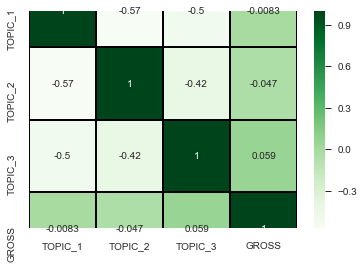

In [55]:
sns.heatmap(topic_corr, annot=True, cmap="Greens", linewidths = 1, linecolor = 'black')

# Data Exploration and Visualization

In [ ]:
list(data.columns)

In [ ]:
# Drop unnecessary columns
data = data.drop(columns = ["TITLE", "ID", "METASCORE", "POPULARITY", "COUNTRIES", "LANGUAGES", "FILMING_LOCATION", "GENRES", "OPENING"])

In [ ]:
data.head()

### Movie Certificates and its Distribution with Gross

In [ ]:
# Move Certificate Description
Movie_Certification_Description = pd.DataFrame((list(zip(["G","PG","PG-13","R","NC-17","R-13","R-16","R-18"], ["General Audience","Parental guidance suggested","Parental guidance cautioned","Restricted","Adult","Restricted–13","Restricted–16","Restricted-18"],["All aged admitted.","Some material may not be suitable for children. Parents urged to give ' Parental Guidance'","Some material may be inappropriate for children under 13. Parents urged to be cautious","Under 17 requires accompanying parent or adult guardian. Contains some adult material","No one 17 and Under Admitted","Only viewers who are 13 years old and above can be admitted","Only viewers who are 16 years old and above can be admitted","Only viewers who are 18 years old and above can be admitted"]))), columns = ['Symbol', 'Meaning','Explanation'])
Movie_Certification_Description

In [ ]:
MOVIE_CERTIFICATE = sns.barplot(x="MOVIE_CERTIFICATE", y="TOP_GROSS", data=data)
MOVIE_CERTIFICATE

Movies rated as "PG" have the highest gross as compared with other certificates. With this, producers will be able to know who to target and what kind of movie they should make to be included in the box office.

In [ ]:
### Release Months vs Gross

In [ ]:
fig, ax = plt.subplots(figsize=(10,5)) 
YEAR_GROSS = sns.barplot(x="RELEASE_YEAR", y="GROSS", data=data)
YEAR_GROSS

In [ ]:
MONTH_GROSS = sns.barplot(x="RELEASE_MONTH", y="GROSS", data=data, palette="Blues_d")
MONTH_GROSS

Movies released during Summer (Vacation season) and Christmas (Bonus Season) have the highest gross. Producers may target those months to release their movies to boost their revenue.

### Budget vs Gross

In [ ]:
BUDGET_GROSS = sns.scatterplot(x="BUDGET", y="GROSS", data=data)
BUDGET_GROSS

Gross does not depend on Budget. As long as producers make the movie according to the other features, they can achieve their target gross.

### IMDB Audience Rating and Gross

In [ ]:
fig, ax = plt.subplots(figsize=(20,5)) 
IMDB_RATING_GROSS = sns.barplot(x="IMDB_RATING", y="GROSS", data=data)
IMDB_RATING_GROSS

This would not be much helpful for predicting gross since rating is submitted after movies are released.

### Runtime and Gross

In [ ]:
RUNTIME_GROSS = sns.scatterplot(x="RUNTIME", y="GROSS", data=data)
RUNTIME_GROSS

Runtime does not guarantee a high gross.

### Directors

In [ ]:
ax = data['DIRECTOR'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Diretors Distribution")
ax.set_xlabel("Directors")
ax.set_ylabel("Frequency")

In [ ]:
data.groupby('DIRECTOR')['DIRECTOR'].count().sort_values(ascending=False)

Filipino Directors have the highest number of produced box office hit movies in the Philippines.

### Actors

In [ ]:
data.groupby('ACTOR_1')['ACTOR_1'].count().sort_values(ascending=False)

In [ ]:
data.groupby('ACTOR_2')['ACTOR_2'].count().sort_values(ascending=False)

In [ ]:
data.groupby('ACTOR_3')['ACTOR_3'].count().sort_values(ascending=False)

### Genres vs Gross

In [ ]:
#correlation of genres to gross
# genres = ["GROSS", "Action", "Animation", "Adventure", "Horror", "Comedy", "Drama", "Biography", "Fantasy", "Family", "Crime", "Documentary", "Short", "Mystery", "Romance", "Sci-Fi", "Thriller", "Music", "Musical", "Sport", "History", "War", "Western"]
# plt.figure(figsize=(15,8))
# data[genres].corr()["GROSS"].sort_values(ascending = False).plot(kind="bar")

Adventure, Sci-Fi, Action are the top 3 genres that have high correlation with the Gross.

In [ ]:
# genres = ['Action', 'Animation', 'Adventure', 'Horror', 'Comedy', 'Drama', 'Biography', 'Fantasy', 'Family', 'Crime', 'Documentary', 'Short', 'Mystery', 'Romance', 'Sci-Fi' , 'Thriller', 'Music', 'Musical', 'Sport', 'History', 'War', 'Western']
# gen_gross = pd.concat([data[genres], data['GROSS']], 1)
# gen_gross

In [ ]:
# Correlate Numeric Data (Correlation does not imply Causation)
# gengross_corr = gen_gross.corr()
# gengross_corr

In [ ]:
# fig, ax = plt.subplots(figsize=(20,15)) 
# sns.heatmap(gengross_corr, annot=True, cmap="Reds", linewidths = 1, linecolor = 'black')

### Genres and Release Month

In [ ]:
GENRE = ["RELEASE_MONTH", "Action", "Animation", "Adventure", "Horror", "Comedy", "Drama", "Biography", "Fantasy", "Family", "Crime", "Documentary", "Short", "Mystery", "Romance", "Sci-Fi", "Thriller", "Music", "Musical", "Sport", "History", "War", "Western"]
plt.figure(figsize=(15,8))
data[GENRE].corr()["RELEASE_MONTH"].sort_values(ascending = False).plot(kind="bar")

### Exploring Gross

In [ ]:
# Statistically Describe Data for Gross
data['GROSS'].describe()

In [ ]:
# Visualize Gross Distribution
sns.distplot(data['GROSS'])

In [ ]:
#skewness of Gross
data['GROSS'].skew()

Gross Data is skewed to the right.

# Classification

## Set Variables

In [56]:
list(data.columns)

['TITLE',
 'ID',
 'RUNTIME',
 'IMDB_RATING',
 'DIRECTOR',
 'DIRECTOR_FB_LIKES',
 'ACTOR_1',
 'ACTOR_1_FB_LIKES',
 'ACTOR_2',
 'ACTOR_2_FB_LIKES',
 'ACTOR_3',
 'ACTOR_3_FB_LIKES',
 'POPULARITY',
 'METASCORE',
 'STORYLINE',
 'GROSS',
 'TOP_GROSS',
 'COUNTRIES',
 'LANGUAGES',
 'RELEASE_DATE',
 'BUDGET',
 'FILMING_LOCATION',
 'PROD_COMPANY',
 'DISTRIBUTOR',
 'GENRES',
 'OPENING',
 'MOVIE_CERTIFICATE',
 'GENRE_1',
 'GENRE_2',
 'GENRE_3',
 'RELEASE_YEAR',
 'RELEASE_MONTH',
 'FLAG_TOP_GROSS',
 'COUNTRY_1',
 'LANGUAGE_1',
 'MOVIE_CERTIFICATE_G',
 'MOVIE_CERTIFICATE_Not Rated',
 'MOVIE_CERTIFICATE_PG',
 'MOVIE_CERTIFICATE_PG-13',
 'MOVIE_CERTIFICATE_R',
 'MOVIE_CERTIFICATE_R-13',
 'MOVIE_CERTIFICATE_R-16',
 'MOVIE_CERTIFICATE_R-18',
 'COUNTRY_1_Argentina',
 'COUNTRY_1_Australia',
 'COUNTRY_1_Belgium',
 'COUNTRY_1_Canada',
 'COUNTRY_1_China',
 'COUNTRY_1_Czech Republic',
 'COUNTRY_1_Finland',
 'COUNTRY_1_France',
 'COUNTRY_1_Germany',
 'COUNTRY_1_Hong Kong',
 'COUNTRY_1_Hungary',
 'COUNTRY_1_Ice

In [166]:
# Set Variables
dependent = data['FLAG_TOP_GROSS']
numeric = ['RUNTIME', 'GENRE_1', 'GENRE_2', 'GENRE_3', 'TOPIC_1', 'TOPIC_2', 'TOPIC_3', 'MOVIE_CERTIFICATE_G', 'MOVIE_CERTIFICATE_Not Rated', 'MOVIE_CERTIFICATE_PG', 'MOVIE_CERTIFICATE_PG-13', 'MOVIE_CERTIFICATE_R', 'MOVIE_CERTIFICATE_R-13', 'MOVIE_CERTIFICATE_R-16', 'MOVIE_CERTIFICATE_R-18',
           'COUNTRY_1_Argentina', 'COUNTRY_1_Australia', 'COUNTRY_1_Belgium', 'COUNTRY_1_Canada', 'COUNTRY_1_China', 'COUNTRY_1_Czech Republic', 'COUNTRY_1_Finland', 'COUNTRY_1_France', 'COUNTRY_1_Germany', 'COUNTRY_1_Hong Kong', 'COUNTRY_1_Hungary', 'COUNTRY_1_Iceland', 'COUNTRY_1_India', 'COUNTRY_1_Indonesia', 'COUNTRY_1_Ireland',
           'COUNTRY_1_Italy', 'COUNTRY_1_Japan', 'COUNTRY_1_Malaysia', 'COUNTRY_1_Malta', 'COUNTRY_1_Mexico', 'COUNTRY_1_Netherlands', 'COUNTRY_1_New Zealand', 'COUNTRY_1_Philippines', 'COUNTRY_1_Russia', 'COUNTRY_1_South Africa', 'COUNTRY_1_South Korea', 'COUNTRY_1_Spain', 'COUNTRY_1_Sweden', 'COUNTRY_1_Switzerland',
           'COUNTRY_1_Thailand', 'COUNTRY_1_UK', 'COUNTRY_1_USA', 'COUNTRY_1_United Arab Emirates', 'COUNTRY_1_Vietnam', 'LANGUAGE_1_Cantonese', 'LANGUAGE_1_English', 'LANGUAGE_1_Filipino', 'LANGUAGE_1_French', 'LANGUAGE_1_German', 'LANGUAGE_1_Indonesian', 'LANGUAGE_1_Japanese', 'LANGUAGE_1_Korean', 'LANGUAGE_1_Malay',
           'LANGUAGE_1_Mandarin', 'LANGUAGE_1_Russian', 'LANGUAGE_1_Spanish', 'LANGUAGE_1_Tagalog', 'LANGUAGE_1_Thai', 'LANGUAGE_1_Vietnamese', 'RELEASE_MONTH_April', 'RELEASE_MONTH_August', 'RELEASE_MONTH_December', 'RELEASE_MONTH_February', 'RELEASE_MONTH_January', 'RELEASE_MONTH_July', 'RELEASE_MONTH_June',
           'RELEASE_MONTH_March', 'RELEASE_MONTH_May', 'RELEASE_MONTH_November', 'RELEASE_MONTH_October', 'RELEASE_MONTH_September']
counts = data[numeric]

# Feature Selection and Train - Test Split

In [167]:
# Define Features: Concatenate the features set above
Features = counts

# Features.head()
# Set X and y
X = Features
y = dependent

In [168]:
X.head()

,RUNTIME,GENRE_1,GENRE_2,GENRE_3,TOPIC_1,TOPIC_2,TOPIC_3,MOVIE_CERTIFICATE_G,MOVIE_CERTIFICATE_Not Rated,MOVIE_CERTIFICATE_PG,...,RELEASE_MONTH_December,RELEASE_MONTH_February,RELEASE_MONTH_January,RELEASE_MONTH_July,RELEASE_MONTH_June,RELEASE_MONTH_March,RELEASE_MONTH_May,RELEASE_MONTH_November,RELEASE_MONTH_October,RELEASE_MONTH_September
0,123.0,0.289819,0.640779,0.069401,0.014642,0.014299,0.971059,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,103.0,0.084809,0.828672,0.086519,0.004876,0.469936,0.525188,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,181.0,0.823106,0.076776,0.100118,0.628904,0.011860,0.359236,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,123.0,0.813112,0.103527,0.083361,0.980708,0.009442,0.009851,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,129.0,0.813179,0.103460,0.083361,0.980489,0.009477,0.010034,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [169]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: FLAG_TOP_GROSS, dtype: int32

In [170]:
X.shape, y.shape

((1655, 76), (1655,))

In [171]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [172]:
X_train.shape, y_train.shape

((1324, 76), (1324,))

In [ ]:
# from sklearn.datasets import load_digits
# from sklearn.feature_selection import SelectKBest, chi2

# # kBest feature selection
# new_X =  SelectKBest(chi2,k=15).fit_transform(X,y)
# new_X.shape

In [ ]:
# new_X

In [ ]:
# Train-test split
# X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size = 0.4, random_state = 42)

# Predictive Analysis

## Logistic Regression

In [173]:
from sklearn.linear_model import LogisticRegression # linear model for classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split # split dataset
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [174]:
# initialize model
log_reg = LogisticRegression()

# fit model
log_reg.fit(X_train, y_train)
# log_reg.fit(X_test, y_test)

# predictions
test_pred = log_reg.predict(X_test)
train_pred = log_reg.predict(X_train)

test_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [175]:
# feature importance
log_reg.coef_

# print(X.columns, log_reg.coef_)

array([[ 0.04606823, -0.35599638, -0.46016256, -2.61647379, -1.13047438,
        -1.06574324, -1.23641508,  0.73087797, -0.60712625,  0.095989  ,
         0.43589165, -1.211025  , -1.16623321, -1.15463879, -0.55636799,
        -0.05456665, -0.31931684, -0.03299392, -0.42778021,  0.23177111,
         0.        , -0.13608563, -0.09877469, -0.05877327, -0.13968908,
        -0.13277611, -0.06835863, -0.02487694, -0.14960537, -0.02377024,
        -0.17316548, -1.06277012, -0.15146742,  0.        , -0.02813168,
         0.        ,  0.03355637,  1.23994466, -0.49985056, -0.30692371,
        -0.51382678, -0.30916914, -0.09486639, -0.07940507, -0.1969886 ,
         0.00485464,  0.19817858, -0.0240363 , -0.03296912, -0.20813021,
         0.03657047,  0.93348601, -0.25192772, -0.16822856, -0.06044812,
        -1.16565207, -0.44405538, -0.40632995, -1.06458287, -0.49985056,
        -0.03937699,  0.06923441, -0.13037195, -0.03296912, -0.58683702,
        -1.30501052,  0.10602789, -0.09292477, -0.4

## Metrics

### Accuracy

In [176]:
log_acc = accuracy_score(y_test, test_pred)
log_acc

0.8157099697885196

In [177]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred, y_train))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred, y_test))

Accuracy score for Training Dataset =  0.8527190332326284
Accuracy score for Testing Dataset =  0.8157099697885196


*Accuracy seems good at this point. But let's first check the confusion matrix.*

### Confusion Matrix

In [178]:
sns.set(style='white', rc={'figure.figsize':(20,10)})

In [179]:
log_cf = confusion_matrix(y_test, test_pred)
log_cf

array([[250,  11],
       [ 50,  20]], dtype=int64)

In [180]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train.ravel(), train_pred, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Training Dataset
Predicted     0    1   All
True                      
0          1053   41  1094
1           154   76   230
All        1207  117  1324


*165 out of 230 (~72%) movies that should be TOP_GROSS were classified as not.*

In [181]:
print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test.ravel(), test_pred.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Testing Dataset
Predicted    0   1  All
True                   
0          250  11  261
1           50  20   70
All        300  31  331


*49 out of 70 (70%) movies that should be TOP_GROSS were classified as not.*

The high accuracy is not due to correct classification. The model has predicted the majority class for almost all the examples. And since about 82% of the examples actually belong to this class, it leads to such high accuracy scores.

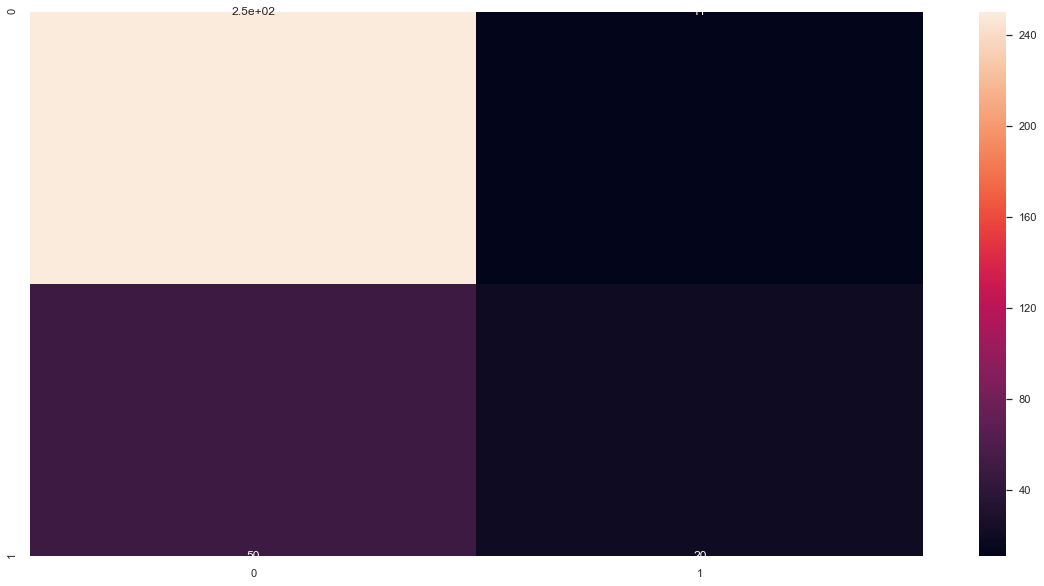

In [182]:
# heatmap of confusion matrix 
sns.heatmap(log_cf, annot = True)

### Precision

In [183]:
from sklearn.metrics import precision_score

In [184]:
log_ps = precision_score(y_test, test_pred)
log_ps

0.6451612903225806

### Recall

In [185]:
from sklearn.metrics import recall_score

In [186]:
log_rs = recall_score(y_test, test_pred)
log_rs

0.2857142857142857

### f1 Score

In [191]:
log_fs = f1_score(y_test, test_pred)
log_fs

0.396039603960396

### ROC Curve

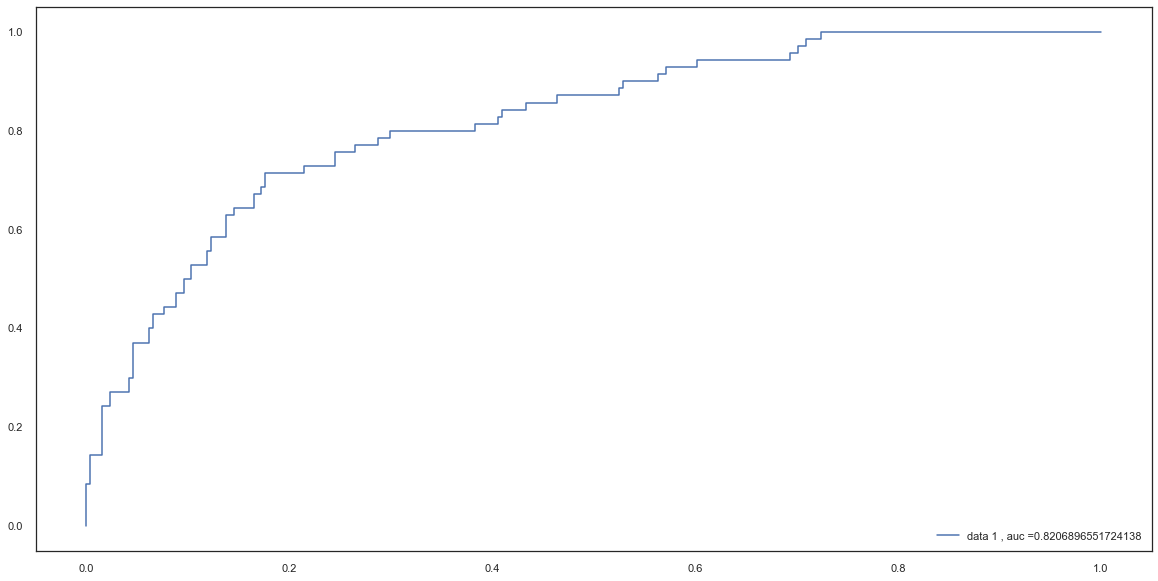

In [192]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred_proba = log_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve (y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label = "data 1 , auc ="+str(auc))
plt.legend(loc= 4)
plt.show()

# Random Forest

In [193]:
# initialize model
random_model = RandomForestClassifier()

# fit model
random_model.fit(X_train, y_train)

# predictions
rf_test_pred = random_model.predict(X_test)
ft_train_pred = random_model.predict(X_train)

In [194]:
rf_test_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Metrics

### Accuracy

In [195]:
rf_acc = accuracy_score(y_test, rf_test_pred)
rf_acc

0.8368580060422961

### Confusion Matrix

In [196]:
sns.set(style='white', rc={'figure.figsize':(20,10)})

In [197]:
rf_cf = confusion_matrix(y_test, rf_test_pred)
rf_cf

array([[253,   8],
       [ 46,  24]], dtype=int64)

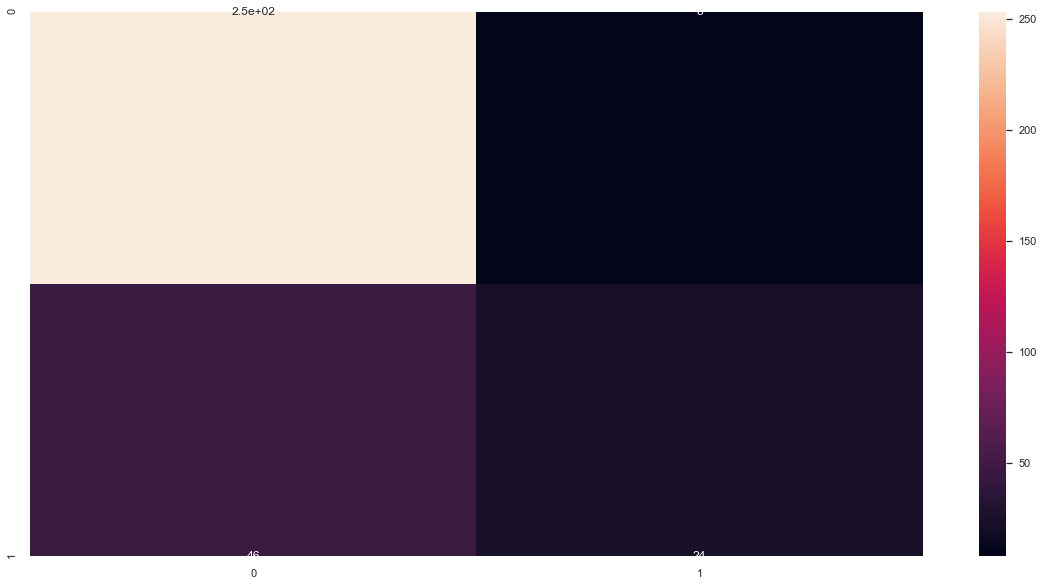

In [198]:
# heatmap of confusion matrix 
sns.heatmap(rf_cf, annot = True)

### Precision

In [199]:
rf_ps = precision_score(y_test, rf_test_pred)
rf_ps

0.75

### Recall

In [200]:
rf_rs = recall_score(y_test, rf_test_pred)
rf_rs

0.34285714285714286

### f1 Score

In [201]:
rf_fs = f1_score(y_test, rf_test_pred)
rf_fs

0.47058823529411753

### ROC Curve

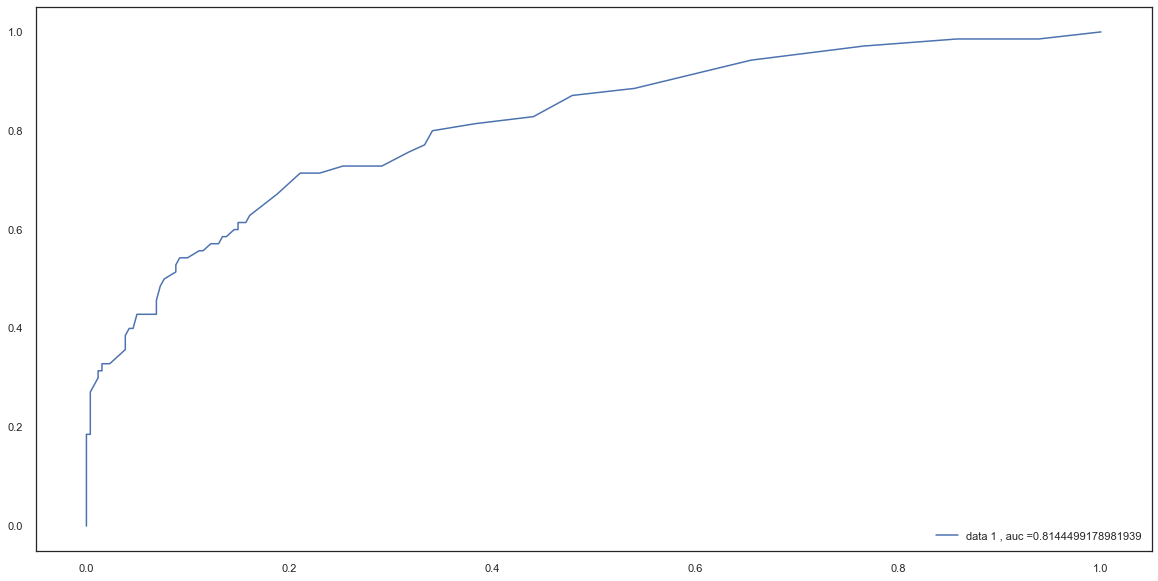

In [202]:
y_random_pred_proba = random_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve (y_test, y_random_pred_proba)
auc = roc_auc_score(y_test, y_random_pred_proba)
plt.plot(fpr, tpr, label = "data 1 , auc ="+str(auc))
plt.legend(loc= 4)
plt.show()

# Random Forest with HyperParameter Tuning

In [203]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 500, 1000],
    'random_state' :[0]
}
# initialize model
random_hypa_model = RandomForestClassifier()

# Instantiate the grid search model
grid_search_random_hypa_model = GridSearchCV(estimator = random_hypa_model, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [204]:
# fit model
grid_search_random_hypa_model.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  1.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [205]:
# predictions
y_rf_hypa_pred = grid_search_random_hypa_model.predict(X_test)
y_rf_hypa_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Metrics

### Accuracy

In [206]:
rf_hypa_acc = accuracy_score(y_test, y_rf_hypa_pred)
rf_hypa_acc

0.7885196374622356

### Confusion Matrix

In [207]:
sns.set(style='white', rc={'figure.figsize':(20,10)})
rf_hypa_cf = confusion_matrix(y_test, y_rf_hypa_pred)
rf_hypa_cf

array([[261,   0],
       [ 70,   0]], dtype=int64)

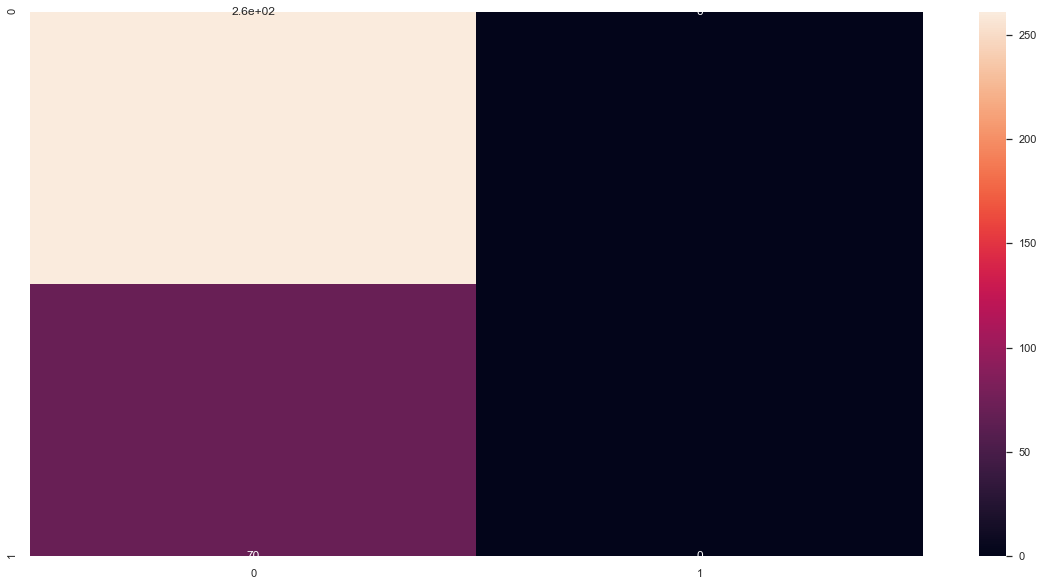

In [208]:
# heatmap of confusion matrix 
sns.heatmap(rf_hypa_cf, annot = True)

### Precision

In [209]:
rf_hypa_ps = precision_score(y_test, y_rf_hypa_pred)
rf_hypa_ps

0.0

### Recall

In [210]:
rf_hypa_rs = recall_score(y_test, y_rf_hypa_pred)
rf_hypa_rs

0.0

### f1 Score

In [211]:
rf_hypa_fs = f1_score(y_test, y_rf_hypa_pred)
rf_hypa_fs

0.0

### ROC Curve

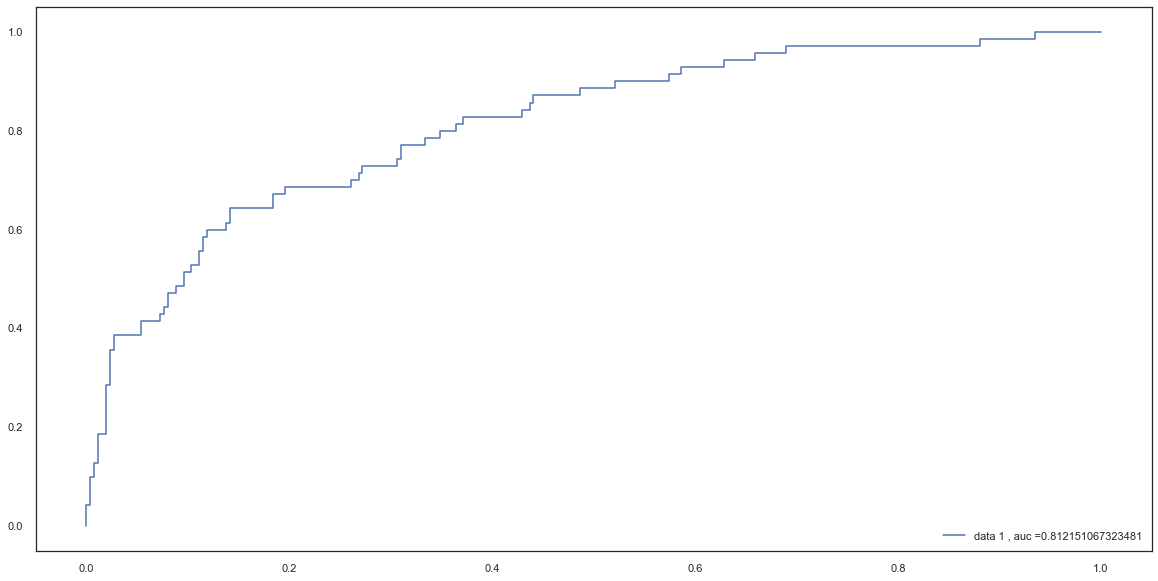

In [212]:
y_random_hypa_pred_proba = grid_search_random_hypa_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve (y_test, y_random_hypa_pred_proba)
auc = roc_auc_score(y_test, y_random_hypa_pred_proba)
plt.plot(fpr, tpr, label = "data 1 , auc ="+str(auc))
plt.legend(loc= 4)
plt.show()

# XG Boost

Let's try to use XGBoost Classifier to see if it will improve our model.

In [213]:
from xgboost import XGBClassifier

In [214]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_test_pred = xgb.predict(X_test)
xgb_train_pred = xgb.predict(X_train)
xgb_test_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Metrics

### Accuracy

In [215]:
xgb_acc = accuracy_score(y_test, xgb_test_pred)
xgb_acc

0.8670694864048338

### Confusion Matrix

In [216]:
xgb_cf = confusion_matrix(y_test, xgb_test_pred)
xgb_cf

array([[255,   6],
       [ 38,  32]], dtype=int64)

In [217]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred, y_train))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred, y_test))

Accuracy score for Training Dataset =  0.8527190332326284
Accuracy score for Testing Dataset =  0.8157099697885196


*Accuracy are higher using XGBoost but let's also try to examine the confusion matrix.*

In [218]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train.ravel(), train_pred, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Training Dataset
Predicted     0    1   All
True                      
0          1053   41  1094
1           154   76   230
All        1207  117  1324


In [219]:
print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test.ravel(), test_pred.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Testing Dataset
Predicted    0   1  All
True                   
0          250  11  261
1           50  20   70
All        300  31  331


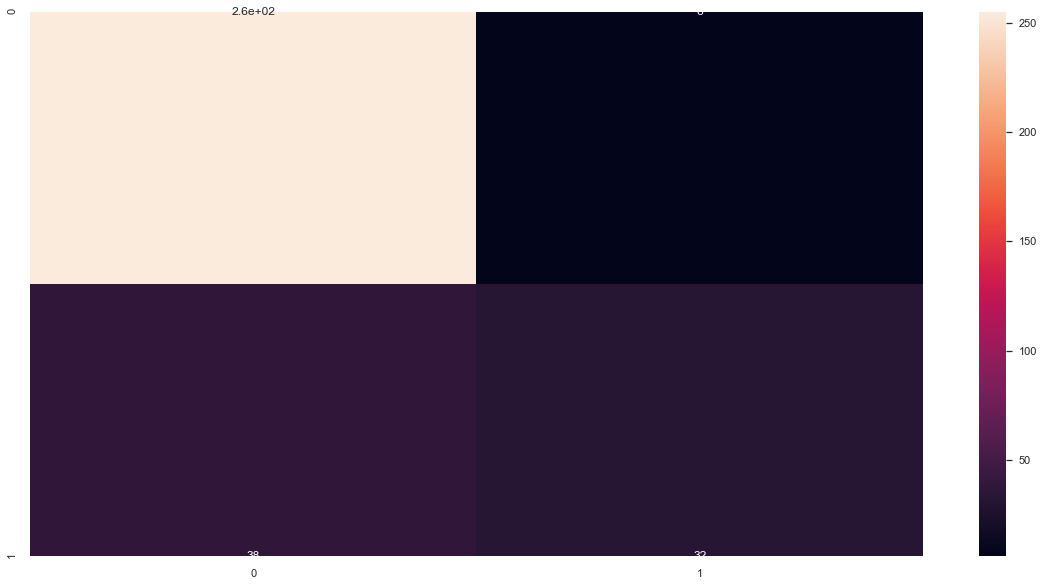

In [220]:
# heatmap of confusion matrix 
sns.heatmap(xgb_cf, annot = True)

### Precision

In [221]:
xgb_ps = precision_score(y_test, xgb_test_pred)
xgb_ps

0.8421052631578947

### Recall

In [222]:
xgb_rs = recall_score(y_test, xgb_test_pred)
xgb_rs

0.45714285714285713

### f1 Score

In [223]:
xgb_fs = f1_score(y_test, xgb_test_pred)
xgb_fs

0.5925925925925926

### ROC Curve

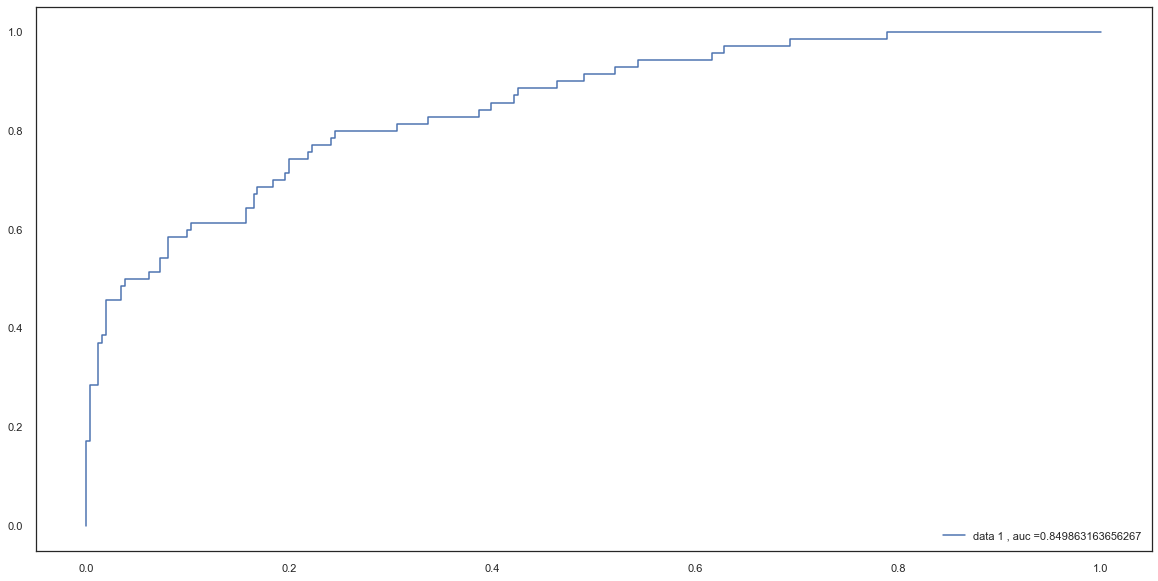

In [224]:
y_pred_proba = xgb.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve (y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label = "data 1 , auc ="+str(auc))
plt.legend(loc= 4)
plt.show()

In [225]:
from sklearn.metrics import classification_report
classification_report(y_test, xgb_test_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False)

'              precision    recall  f1-score   support\n\n           0       0.87      0.98      0.92       261\n           1       0.84      0.46      0.59        70\n\n    accuracy                           0.87       331\n   macro avg       0.86      0.72      0.76       331\nweighted avg       0.86      0.87      0.85       331\n'

# XGBoost with HyperParameter Tuning

In [226]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'objective' : ['multi:softmax', 'multi:softprob'],
     'n_estimators': [100, 500, 1000],
     'random_state': [0],
    'num_class': [2]
}
# initialize model
XGB_hypa_model =  XGBClassifier()

# Instantiate the grid search model
grid_search_XGB_hypa_model = GridSearchCV(estimator = XGB_hypa_model, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [227]:
# fit model
grid_search_XGB_hypa_model.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   53.3s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_estimators': [100, 500, 1000], 'num_class': [2],
                         'objective': ['multi:softmax', 'multi:softprob'],
                         'r

In [228]:
# predictions
y_XGB_hypa_pred = grid_search_XGB_hypa_model.predict(X_test)
y_XGB_hypa_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Metrics

### Accuracy

In [229]:
XGB_hypa_acc = accuracy_score(y_test, y_XGB_hypa_pred)
XGB_hypa_acc

0.8700906344410876

### Confusion Matrix

In [230]:
XGB_hypa_cf = confusion_matrix(y_test, y_XGB_hypa_pred)
XGB_hypa_cf

array([[255,   6],
       [ 37,  33]], dtype=int64)

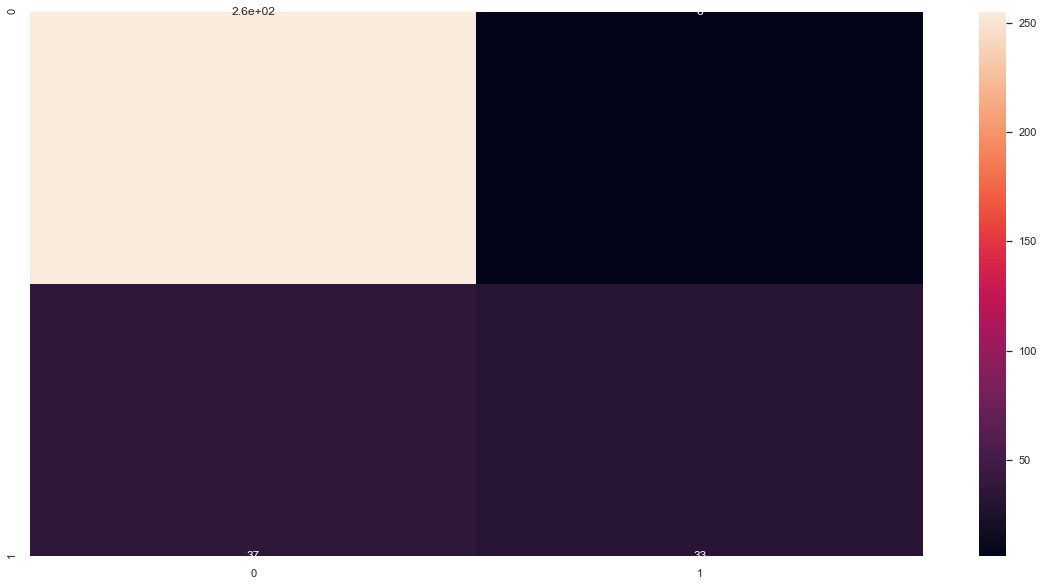

In [231]:
# heatmap of confusion matrix 
sns.heatmap(XGB_hypa_cf, annot = True)

### Precision

In [232]:
XGB_hypa_ps = precision_score(y_test, y_XGB_hypa_pred)
XGB_hypa_ps

0.8461538461538461

### Recall

In [233]:
XGB_hypa_rs = recall_score(y_test, y_XGB_hypa_pred)
XGB_hypa_rs

0.4714285714285714

### f1 Score

In [234]:
XGB_hypa_fs = f1_score(y_test, y_XGB_hypa_pred)
XGB_hypa_fs

0.6055045871559632

### ROC Curve

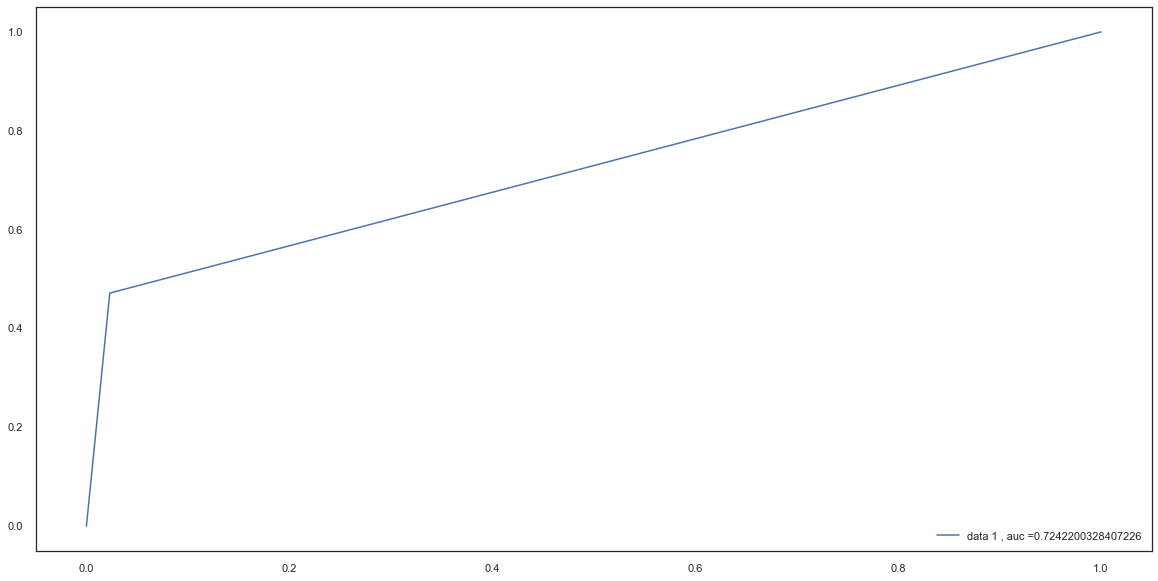

In [235]:
y_XGB_hypa_pred_proba = grid_search_XGB_hypa_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve (y_test, y_XGB_hypa_pred_proba)
auc = roc_auc_score(y_test, y_XGB_hypa_pred_proba)
plt.plot(fpr, tpr, label = "data 1 , auc ="+str(auc))
plt.legend(loc= 4)
plt.show()

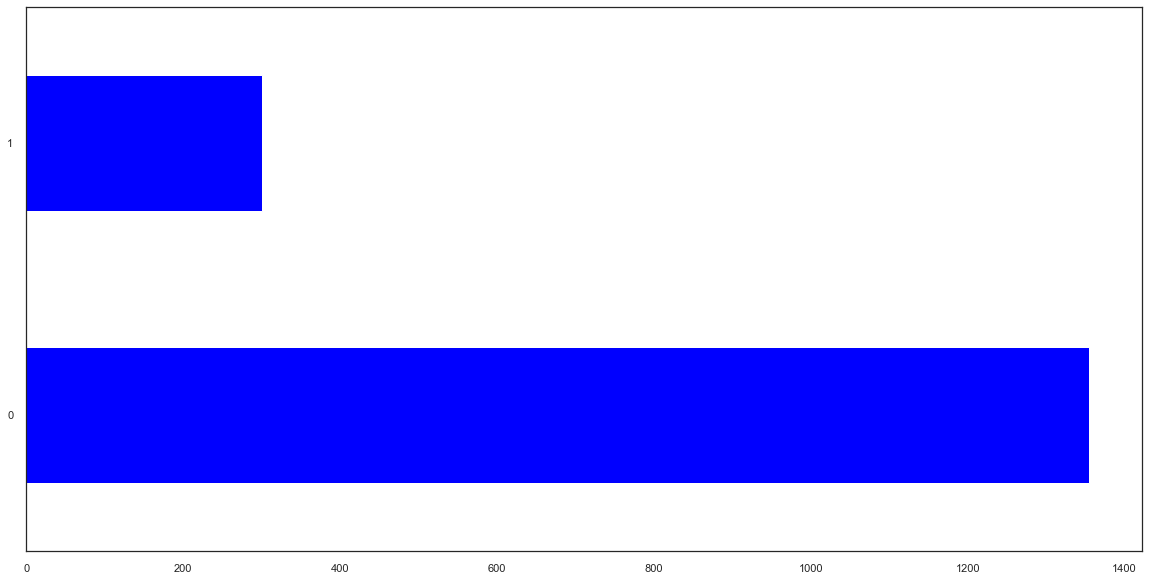

In [236]:
# DISTRIBUTION OF FLAG_TOP_GROSS
data.FLAG_TOP_GROSS.value_counts().plot(kind="barh", color="blue")

In [237]:
print('Proportion of the Top Gross in the data:')
print(data['FLAG_TOP_GROSS'].value_counts() / len(data))

Proportion of the Top Gross in the data:
0    0.818731
1    0.181269
Name: FLAG_TOP_GROSS, dtype: float64


# DEALING WITH IMBALANCED DATA

## Generate Synthetic Samples

SMOTEing is used to increase accuracy
--
- If accuracy of SMOTEd data is almost equal with the original, no need to SMOTE
- If accuracy of SMOTEd data is lower than the original, no need to SMOTE
- If accuracy of SMOTEd data is higher than the original, use the SMOTEd data

In [238]:
# !pip install imbalanced_learn as imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_res, y_res = sm.fit_resample (X, y)

In [239]:
from collections import Counter
print(Counter(y).keys())
print(Counter(y).values())

dict_keys([1, 0])
dict_values([300, 1355])


In [240]:
from collections import Counter
print(Counter(y_res).keys())
print(Counter(y_res).values())

dict_keys([1, 0])
dict_values([1355, 1355])


In [241]:
# Train-test split
s_X_train, s_X_test, s_y_train, s_y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 42)

In [242]:
s_X_train.shape, s_y_train.shape

((2168, 76), (2168,))

## Logistic Regression

In [243]:
# initialize model
log_reg = LogisticRegression()
# fit model
log_reg.fit(s_X_train, s_y_train)
# predictions
s_y_pred = log_reg.predict(s_X_test)

In [244]:
s_log_acc = accuracy_score(s_y_test, s_y_pred)
s_log_acc

0.8874538745387454

In [245]:
s_log_cf = confusion_matrix(s_y_test, s_y_pred)
s_log_cf

array([[252,  29],
       [ 32, 229]], dtype=int64)

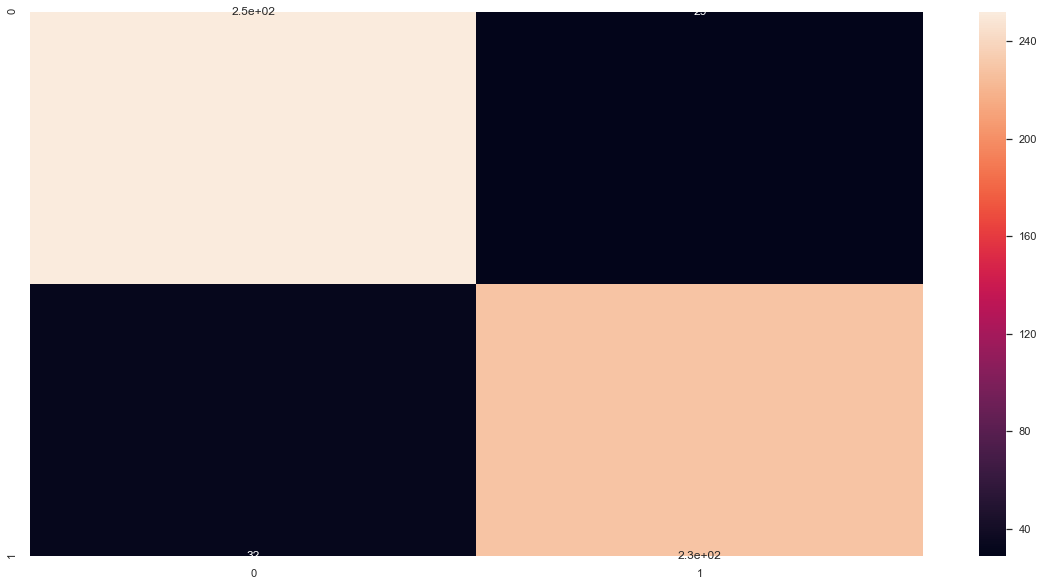

In [246]:
# heatmap of confusion matrix 
sns.heatmap(s_log_cf, annot = True)

In [247]:
s_log_ps = precision_score(s_y_test, s_y_pred)
s_log_ps

0.8875968992248062

In [248]:
s_log_rs = recall_score(s_y_test, s_y_pred)
s_log_rs

0.8773946360153256

In [249]:
s_log_fs = f1_score(s_y_test, s_y_pred)
s_log_fs

0.8824662813102119

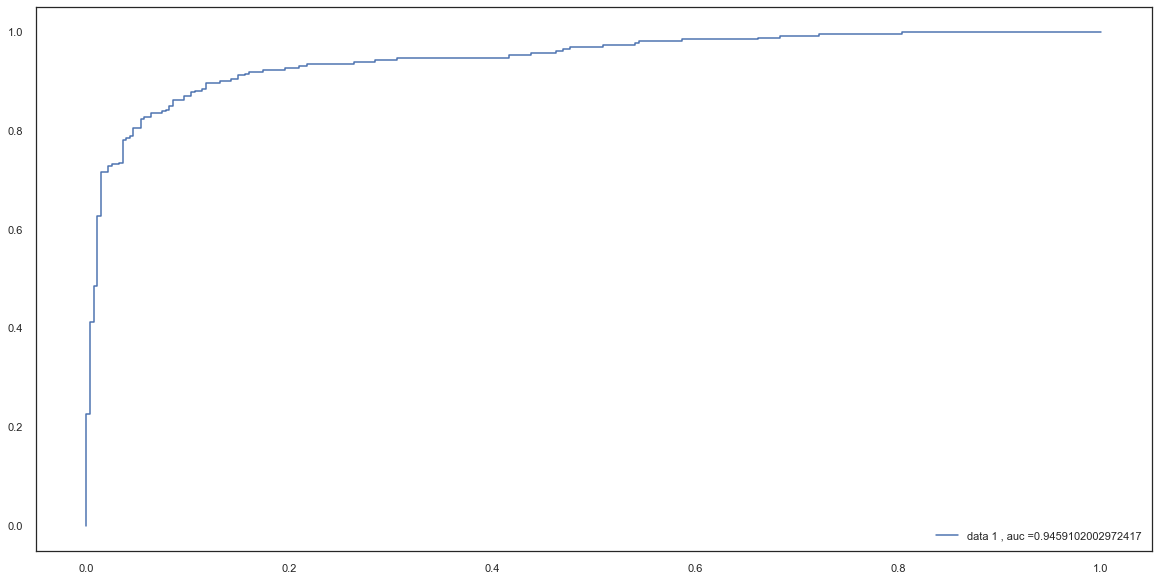

In [250]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
s_y_pred_proba = log_reg.predict_proba(s_X_test)[::,1]
fpr, tpr, _ = roc_curve (s_y_test, s_y_pred_proba)
auc = roc_auc_score(s_y_test, s_y_pred_proba)
plt.plot(fpr, tpr, label = "data 1 , auc ="+str(auc))
plt.legend(loc= 4)
plt.show()

## Random Forest

In [251]:
# initialize model
s_random_model = RandomForestClassifier()

# fit model
s_random_model.fit(s_X_train, s_y_train)

# predictions
s_y_rf_pred = s_random_model.predict(s_X_test)
s_y_rf_pred

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,

In [252]:
s_rf_acc = accuracy_score(s_y_test, s_y_rf_pred)
s_rf_acc

0.9003690036900369

In [253]:
s_rf_cf = confusion_matrix(s_y_test, s_y_rf_pred)
s_rf_cf

array([[251,  30],
       [ 24, 237]], dtype=int64)

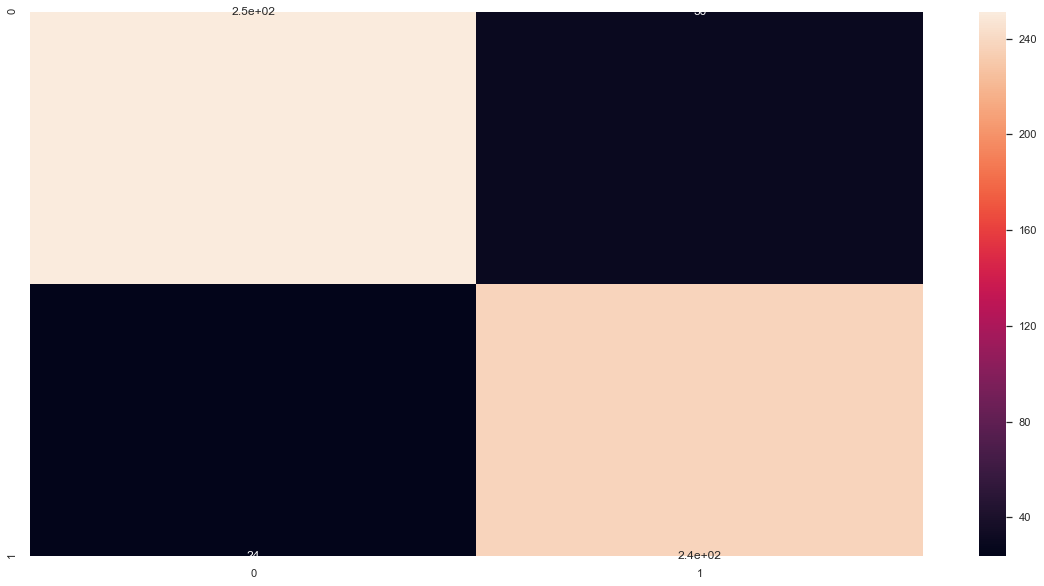

In [254]:
# heatmap of confusion matrix 
sns.heatmap(s_rf_cf, annot = True)

In [255]:
s_rf_ps = precision_score(s_y_test, s_y_rf_pred)
s_rf_ps

0.8876404494382022

In [256]:
s_rf_rs = recall_score(s_y_test, s_y_rf_pred)
s_rf_rs

0.9080459770114943

In [258]:
s_rf_fs = f1_score(s_y_test, s_y_rf_pred)
s_rf_fs

0.8977272727272727

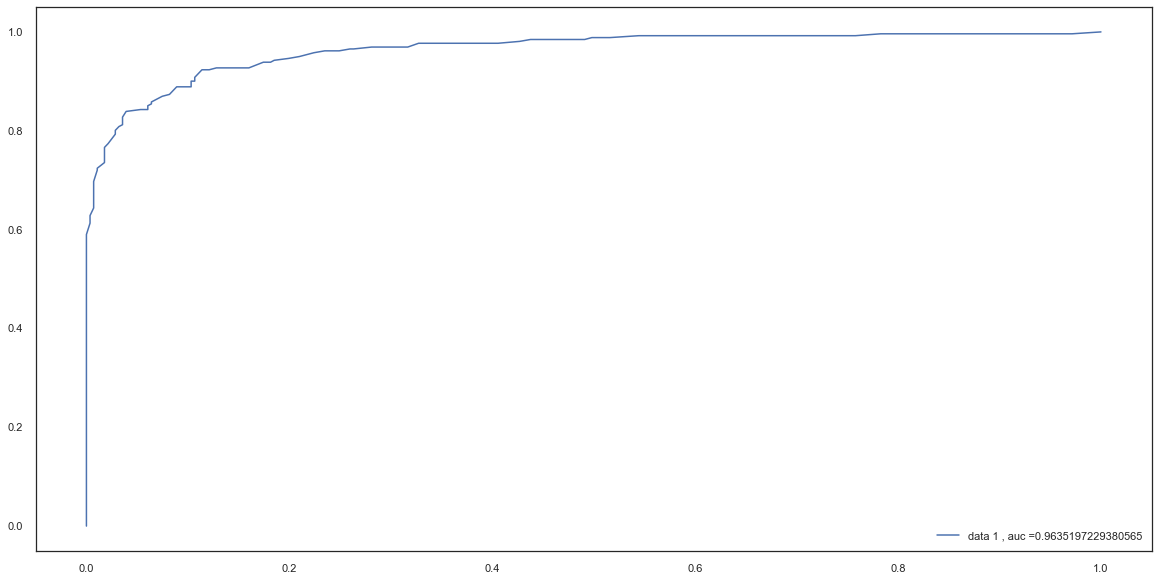

In [259]:
s_y_random_pred_proba = s_random_model.predict_proba(s_X_test)[::,1]
fpr, tpr, _ = roc_curve (s_y_test, s_y_random_pred_proba)
auc = roc_auc_score(s_y_test, s_y_random_pred_proba)
plt.plot(fpr, tpr, label = "data 1 , auc ="+str(auc))
plt.legend(loc= 4)
plt.show()

## Random Forest with HyperParameter Tuning

In [260]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 500, 1000],
    'random_state' :[0]
}
# initialize model
s_random_hypa_model = RandomForestClassifier()

# Instantiate the grid search model
s_grid_search_random_hypa_model = GridSearchCV(estimator = s_random_hypa_model, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [261]:
# fit model
s_grid_search_random_hypa_model.fit(s_X_train, s_y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  1.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [262]:
# predictions
s_y_rf_hypa_pred = s_grid_search_random_hypa_model.predict(s_X_test)
s_y_rf_hypa_pred

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,

In [263]:
s_rf_hypa_acc = accuracy_score(s_y_test, s_y_rf_hypa_pred)
s_rf_hypa_acc

0.8560885608856088

In [264]:
s_rf_hypa_cf = confusion_matrix(s_y_test, s_y_rf_hypa_pred)
s_rf_hypa_cf

array([[233,  48],
       [ 30, 231]], dtype=int64)

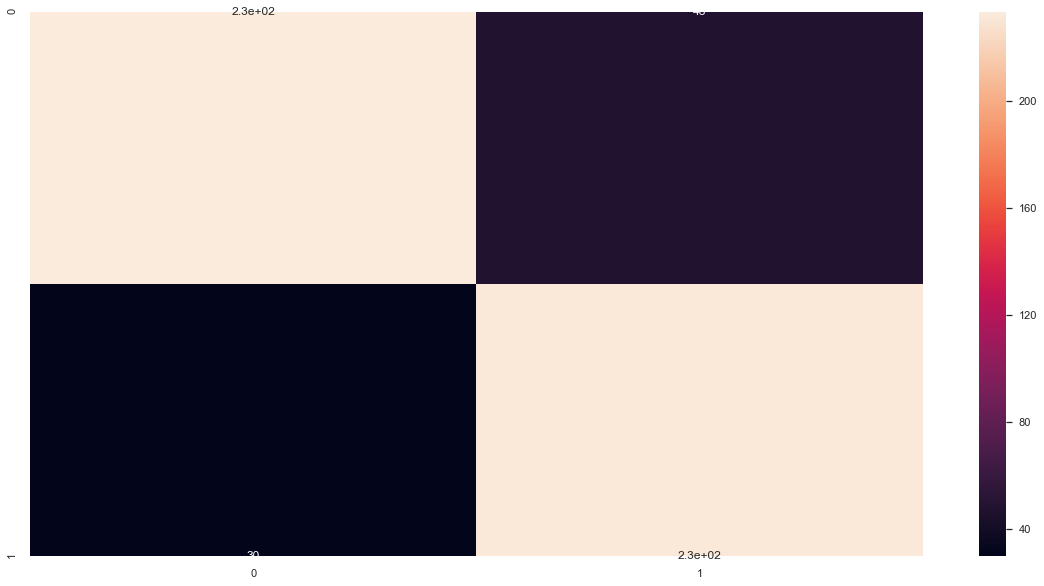

In [265]:
# heatmap of confusion matrix 
sns.heatmap(s_rf_hypa_cf, annot = True)

In [278]:
s_rf_hypa_ps = precision_score(s_y_test, s_y_rf_hypa_pred)
s_rf_hypa_ps

0.8279569892473119

In [279]:
s_rf_hypa_rs = recall_score(s_y_test, s_y_rf_hypa_pred)
s_rf_hypa_rs

0.8850574712643678

In [280]:
s_rf_hypa_fs = f1_score(s_y_test, s_y_rf_hypa_pred)
s_rf_hypa_fs

0.8555555555555556

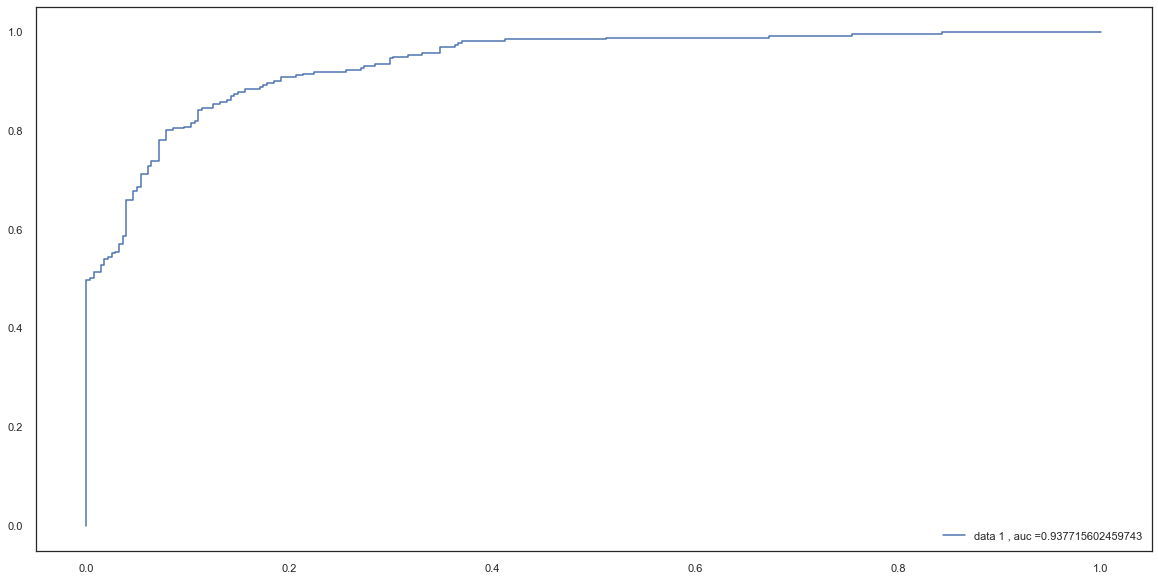

In [281]:
s_y_random_hypa_pred_proba = s_grid_search_random_hypa_model.predict_proba(s_X_test)[::,1]
fpr, tpr, _ = roc_curve (s_y_test, s_y_random_hypa_pred_proba)
auc = roc_auc_score(s_y_test, s_y_random_hypa_pred_proba)
plt.plot(fpr, tpr, label = "data 1 , auc ="+str(auc))
plt.legend(loc= 4)
plt.show()

## XGBoost

In [282]:
xgb = XGBClassifier()
xgb.fit(s_X_train, s_y_train)
s_xgb_y_pred = xgb.predict(s_X_test)

In [283]:
s_xgb_y_pred

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,

In [284]:
s_xgb_acc = accuracy_score(s_y_test, s_xgb_y_pred)
s_xgb_acc

0.8929889298892989

In [285]:
s_xgb_cf = confusion_matrix(s_y_test, s_xgb_y_pred)
s_xgb_cf

array([[245,  36],
       [ 22, 239]], dtype=int64)

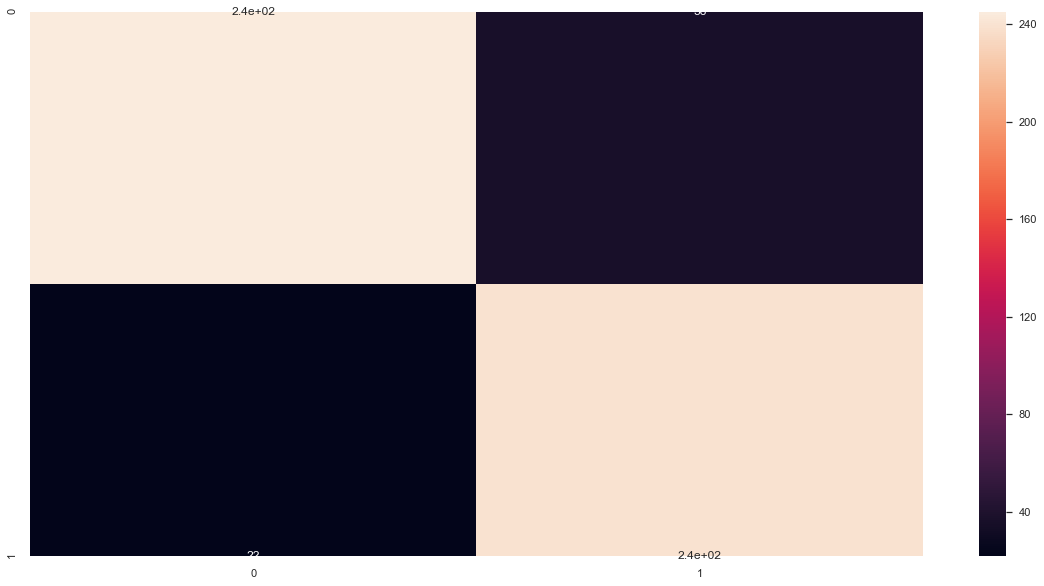

In [286]:
# heatmap of confusion matrix 
sns.heatmap(s_xgb_cf, annot = True)

In [287]:
s_xgb_ps = precision_score(s_y_test, s_xgb_y_pred)
s_xgb_ps

0.8690909090909091

In [288]:
s_xgb_rs = recall_score(s_y_test, s_xgb_y_pred)
s_xgb_rs

0.9157088122605364

In [289]:
s_xgb_fs = f1_score(s_y_test, s_xgb_y_pred)
s_xgb_fs

0.8917910447761195

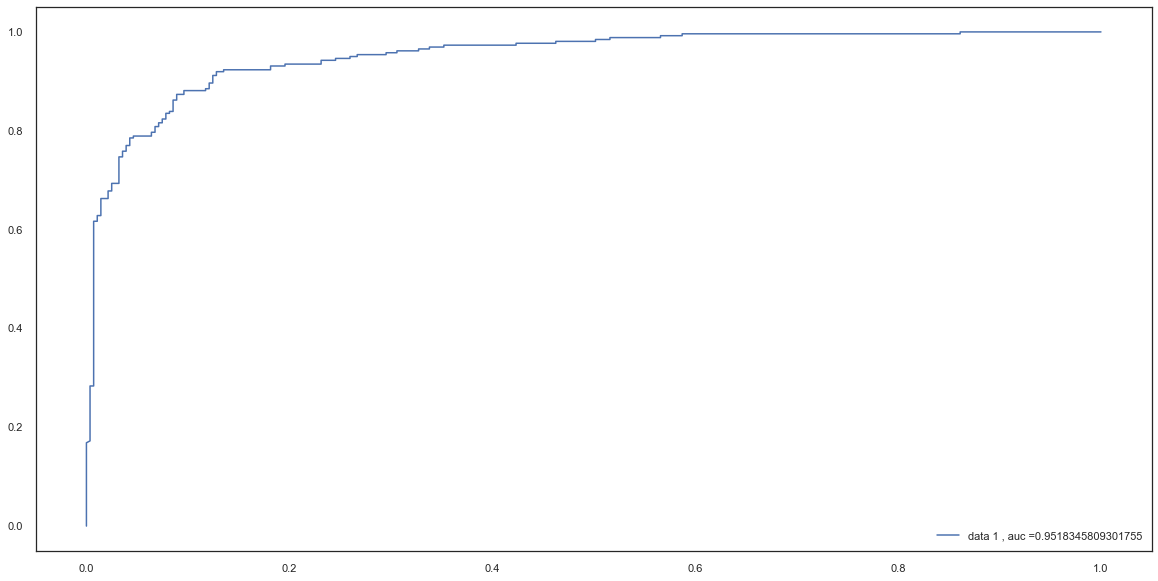

In [290]:
s_xgb_y_pred_proba = xgb.predict_proba(s_X_test)[::,1]
fpr, tpr, _ = roc_curve (s_y_test, s_xgb_y_pred_proba)
auc = roc_auc_score(s_y_test, s_xgb_y_pred_proba)
plt.plot(fpr, tpr, label = "data 1 , auc ="+str(auc))
plt.legend(loc= 4)
plt.show()

## XGBoost with HyperParameter Tuning

In [291]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'objective' : ['multi:softmax', 'multi:softprob'],
     'n_estimators': [100, 500, 1000],
     'random_state': [0],
    'num_class': [2]
}
# initialize model
s_XGB_hypa_model =  XGBClassifier()

# Instantiate the grid search model
s_grid_search_XGB_hypa_model = GridSearchCV(estimator = s_XGB_hypa_model, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [292]:
# fit model
s_grid_search_XGB_hypa_model.fit(s_X_train, s_y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_estimators': [100, 500, 1000], 'num_class': [2],
                         'objective': ['multi:softmax', 'multi:softprob'],
                         'r

In [293]:
# predictions
s_y_XGB_hypa_pred = s_grid_search_XGB_hypa_model.predict(s_X_test)
s_y_XGB_hypa_pred

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,

In [294]:
s_XGB_hypa_acc = accuracy_score(s_y_test, s_y_XGB_hypa_pred)
s_XGB_hypa_acc

0.9059040590405905

In [295]:
s_XGB_hypa_cf = confusion_matrix(s_y_test, s_y_XGB_hypa_pred)
s_XGB_hypa_cf

array([[254,  27],
       [ 24, 237]], dtype=int64)

In [296]:
s_XGB_hypa_ps = precision_score(s_y_test, s_y_XGB_hypa_pred)
s_XGB_hypa_ps

0.8977272727272727

In [297]:
s_XGB_hypa_rs = recall_score(s_y_test, s_y_XGB_hypa_pred)
s_XGB_hypa_rs

0.9080459770114943

In [298]:
s_XGB_hypa_fs = f1_score(s_y_test, s_y_XGB_hypa_pred)
s_XGB_hypa_fs

0.9028571428571429

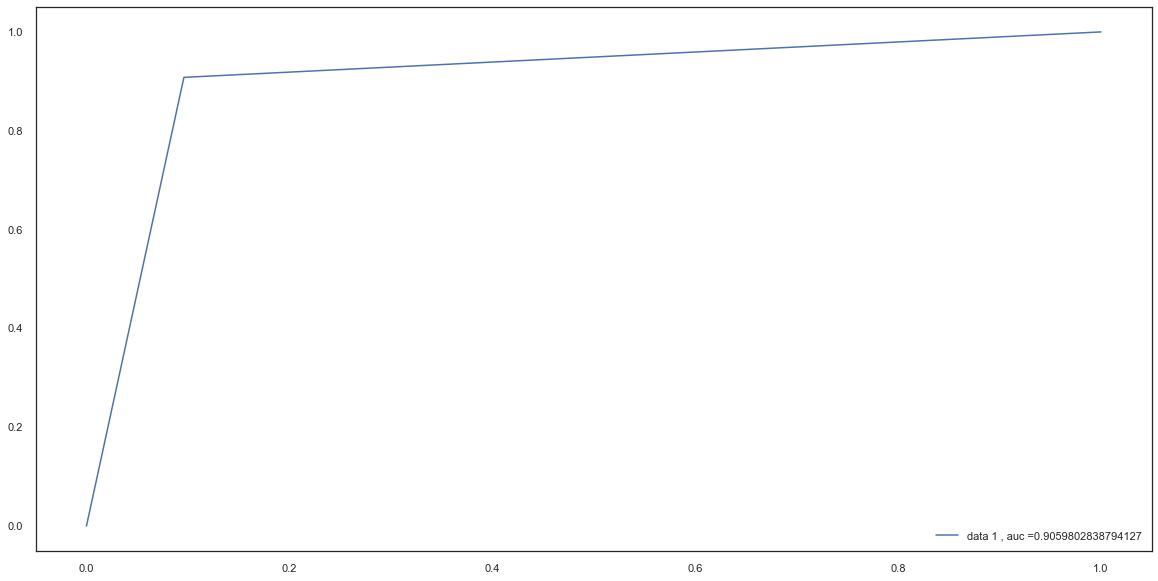

In [299]:
s_y_XGB_hypa_pred_proba = s_grid_search_XGB_hypa_model.predict_proba(s_X_test)[::,1]
fpr, tpr, _ = roc_curve (s_y_test, s_y_XGB_hypa_pred_proba)
auc = roc_auc_score(s_y_test, s_y_XGB_hypa_pred_proba)
plt.plot(fpr, tpr, label = "data 1 , auc ="+str(auc))
plt.legend(loc= 4)
plt.show()

## MODEL ACCURACY COMPARISON

### *(Of all the predictions, how many are correct?)*

In [ ]:
ACC = pd.DataFrame((list(zip(["Logistic","XGBoost","Logistic_SMOTEd", "XGBoost_SMOTEd"], [log_acc,acc_xgb,s_acc_log,s_acc_xgb]))), columns = ['Models', 'Accuracy'])
ACC

## MODEL PRECISION COMPARISON

### *(How many, from the predicted items, are relevant?)*

In [ ]:
PREC = pd.DataFrame((list(zip(["Logistic","XGBoost","Logistic_SMOTEd", "XGBoost_SMOTEd"], [log_ps,xgb_ps,s_ps_log,s_ps_xgb]))), columns = ['Models', 'Accuracy'])
PREC

## MODEL RECALL COMPARISON

### *(How many relevant items were selected?)*

In [ ]:
REC = pd.DataFrame((list(zip(["Logistic","XGBoost","Logistic_SMOTEd", "XGBoost_SMOTEd"], [log_rs,xgb_rs,s_rs_log,s_rs_xgb]))), columns = ['Models', 'Accuracy'])
REC

XGBoost Algorithm using SMOTEd Data seems to be the best model since it resulted to high accuracy, precision, and recall.

In [ ]:
xgb.score(X_test, y_test)

In [ ]:
feature_importance = xgb.feature_importances_
sorted_importance = np.argsort(feature_importance)
pos = np.arange(len(sorted_importance))
plt.figure(figsize=(12,10))
plt.barh(pos, feature_importance[sorted_importance],align='center')
plt.yticks(pos, s_X_train.columns[sorted_importance],fontsize=9)
plt.title('Feature Importance ',fontsize=18)
plt.show()

# Model Comparison

### Imbalanced Data

In [300]:
Classification_metric = pd.DataFrame((list(zip(["Logictic Regression", "Random Forest","Random Forest HyperParam", "XGBoost","XGBoost HyperParam"], [log_acc,rf_acc,rf_hypa_acc,xgb_acc,XGB_hypa_acc], [log_rs,rf_rs,rf_hypa_rs,xgb_rs,XGB_hypa_rs], [log_ps,rf_ps,rf_hypa_ps,xgb_ps,XGB_hypa_ps], [log_fs,rf_fs,rf_hypa_fs,xgb_fs,XGB_hypa_fs]))), columns = ['Models', 'Accuracy','Recall', 'Precision', 'f1 Score'])
Classification_metric

,Models,Accuracy,Recall,Precision,f1 Score
0,Logictic Regression,0.815710,0.285714,0.645161,0.396040
1,Random Forest,0.836858,0.342857,0.750000,0.470588
2,Random Forest HyperParam,0.788520,0.000000,0.000000,0.000000
3,XGBoost,0.867069,0.457143,0.842105,0.592593
4,XGBoost HyperParam,0.870091,0.471429,0.846154,0.605505


### SMOTEd Data

In [301]:
Classification_metrics = pd.DataFrame((list(zip(["Logictic Regression", "Random Forest","Random Forest HyperParam", "XGBoost","XGBoost HyperParam"], [s_log_acc,s_rf_acc,s_rf_hypa_acc,s_xgb_acc,s_XGB_hypa_acc], [s_log_rs,s_rf_rs,s_rf_hypa_rs,s_xgb_rs,s_XGB_hypa_rs], [s_log_ps,s_rf_ps,s_rf_hypa_ps,s_xgb_ps,s_XGB_hypa_ps], [s_log_fs,s_rf_fs,s_rf_hypa_fs,s_xgb_fs,s_XGB_hypa_fs]))), columns = ['Models', 'Accuracy','Recall', 'Precision', 'f1 Score'])
Classification_metrics

,Models,Accuracy,Recall,Precision,f1 Score
0,Logictic Regression,0.887454,0.877395,0.887597,0.882466
1,Random Forest,0.900369,0.908046,0.887640,0.897727
2,Random Forest HyperParam,0.856089,0.885057,0.827957,0.855556
3,XGBoost,0.892989,0.915709,0.869091,0.891791
4,XGBoost HyperParam,0.905904,0.908046,0.897727,0.902857


In [ ]:
data.to_csv('FINAL_NA_TALAGA.csv')